In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math   
from itertools import combinations


In [2]:
trees = ["(((4,3),2),1)","(((4,2),3),1)","(((3,2),4),1)","(((4,3),1),2)","(((4,1),3),2)",
         "(((1,3),4),2)","(((1,2),4),3)","(((4,2),1),3)","(((4,1),2),3)","(((1,2),3),4)",
         "(((1,3),2),4)","(((3,2),1),4)","((4,3),(2,1))","((4,1),(2,3))","((4,2),(3,1))"]

sortTree = ["(((1,2),3),4)","(((1,2),4),3)","(((4,3),2),1)","(((4,3),1),2)","((4,3),(2,1))",
            "(((1,3),4),2)","(((1,3),2),4)","(((4,2),3),1)","(((4,2),1),3)","((4,2),(3,1))",
            "(((3,2),1),4)","(((3,2),4),1)","(((4,1),3),2)","(((4,1),2),3)","((4,1),(2,3))"]

In [3]:
unrooted = ["1: 12|34","2: 13|24","3: 14|23","4: 12|34","5: 14|23",
            "6: 13|24","7: 12|34","8: 13|24","9: 14|23","10: 12|34",
            "11: 13|24","12: 14|23","13: 12|34","14: 14|23","15: 13|24"]
newIdx = ["1: 12|34", "4: 12|34", "7: 12|34", "10: 12|34", "13: 12|34", 
          "2: 13|24", "6: 13|24", "8: 13|24", "11: 13|24", "15: 13|24", 
          "3: 14|23", "5: 14|23", "9: 14|23", "12: 14|23", "14: 14|23"]
change = ["org","inc","inc_r","dec","dec_r","all_r"]

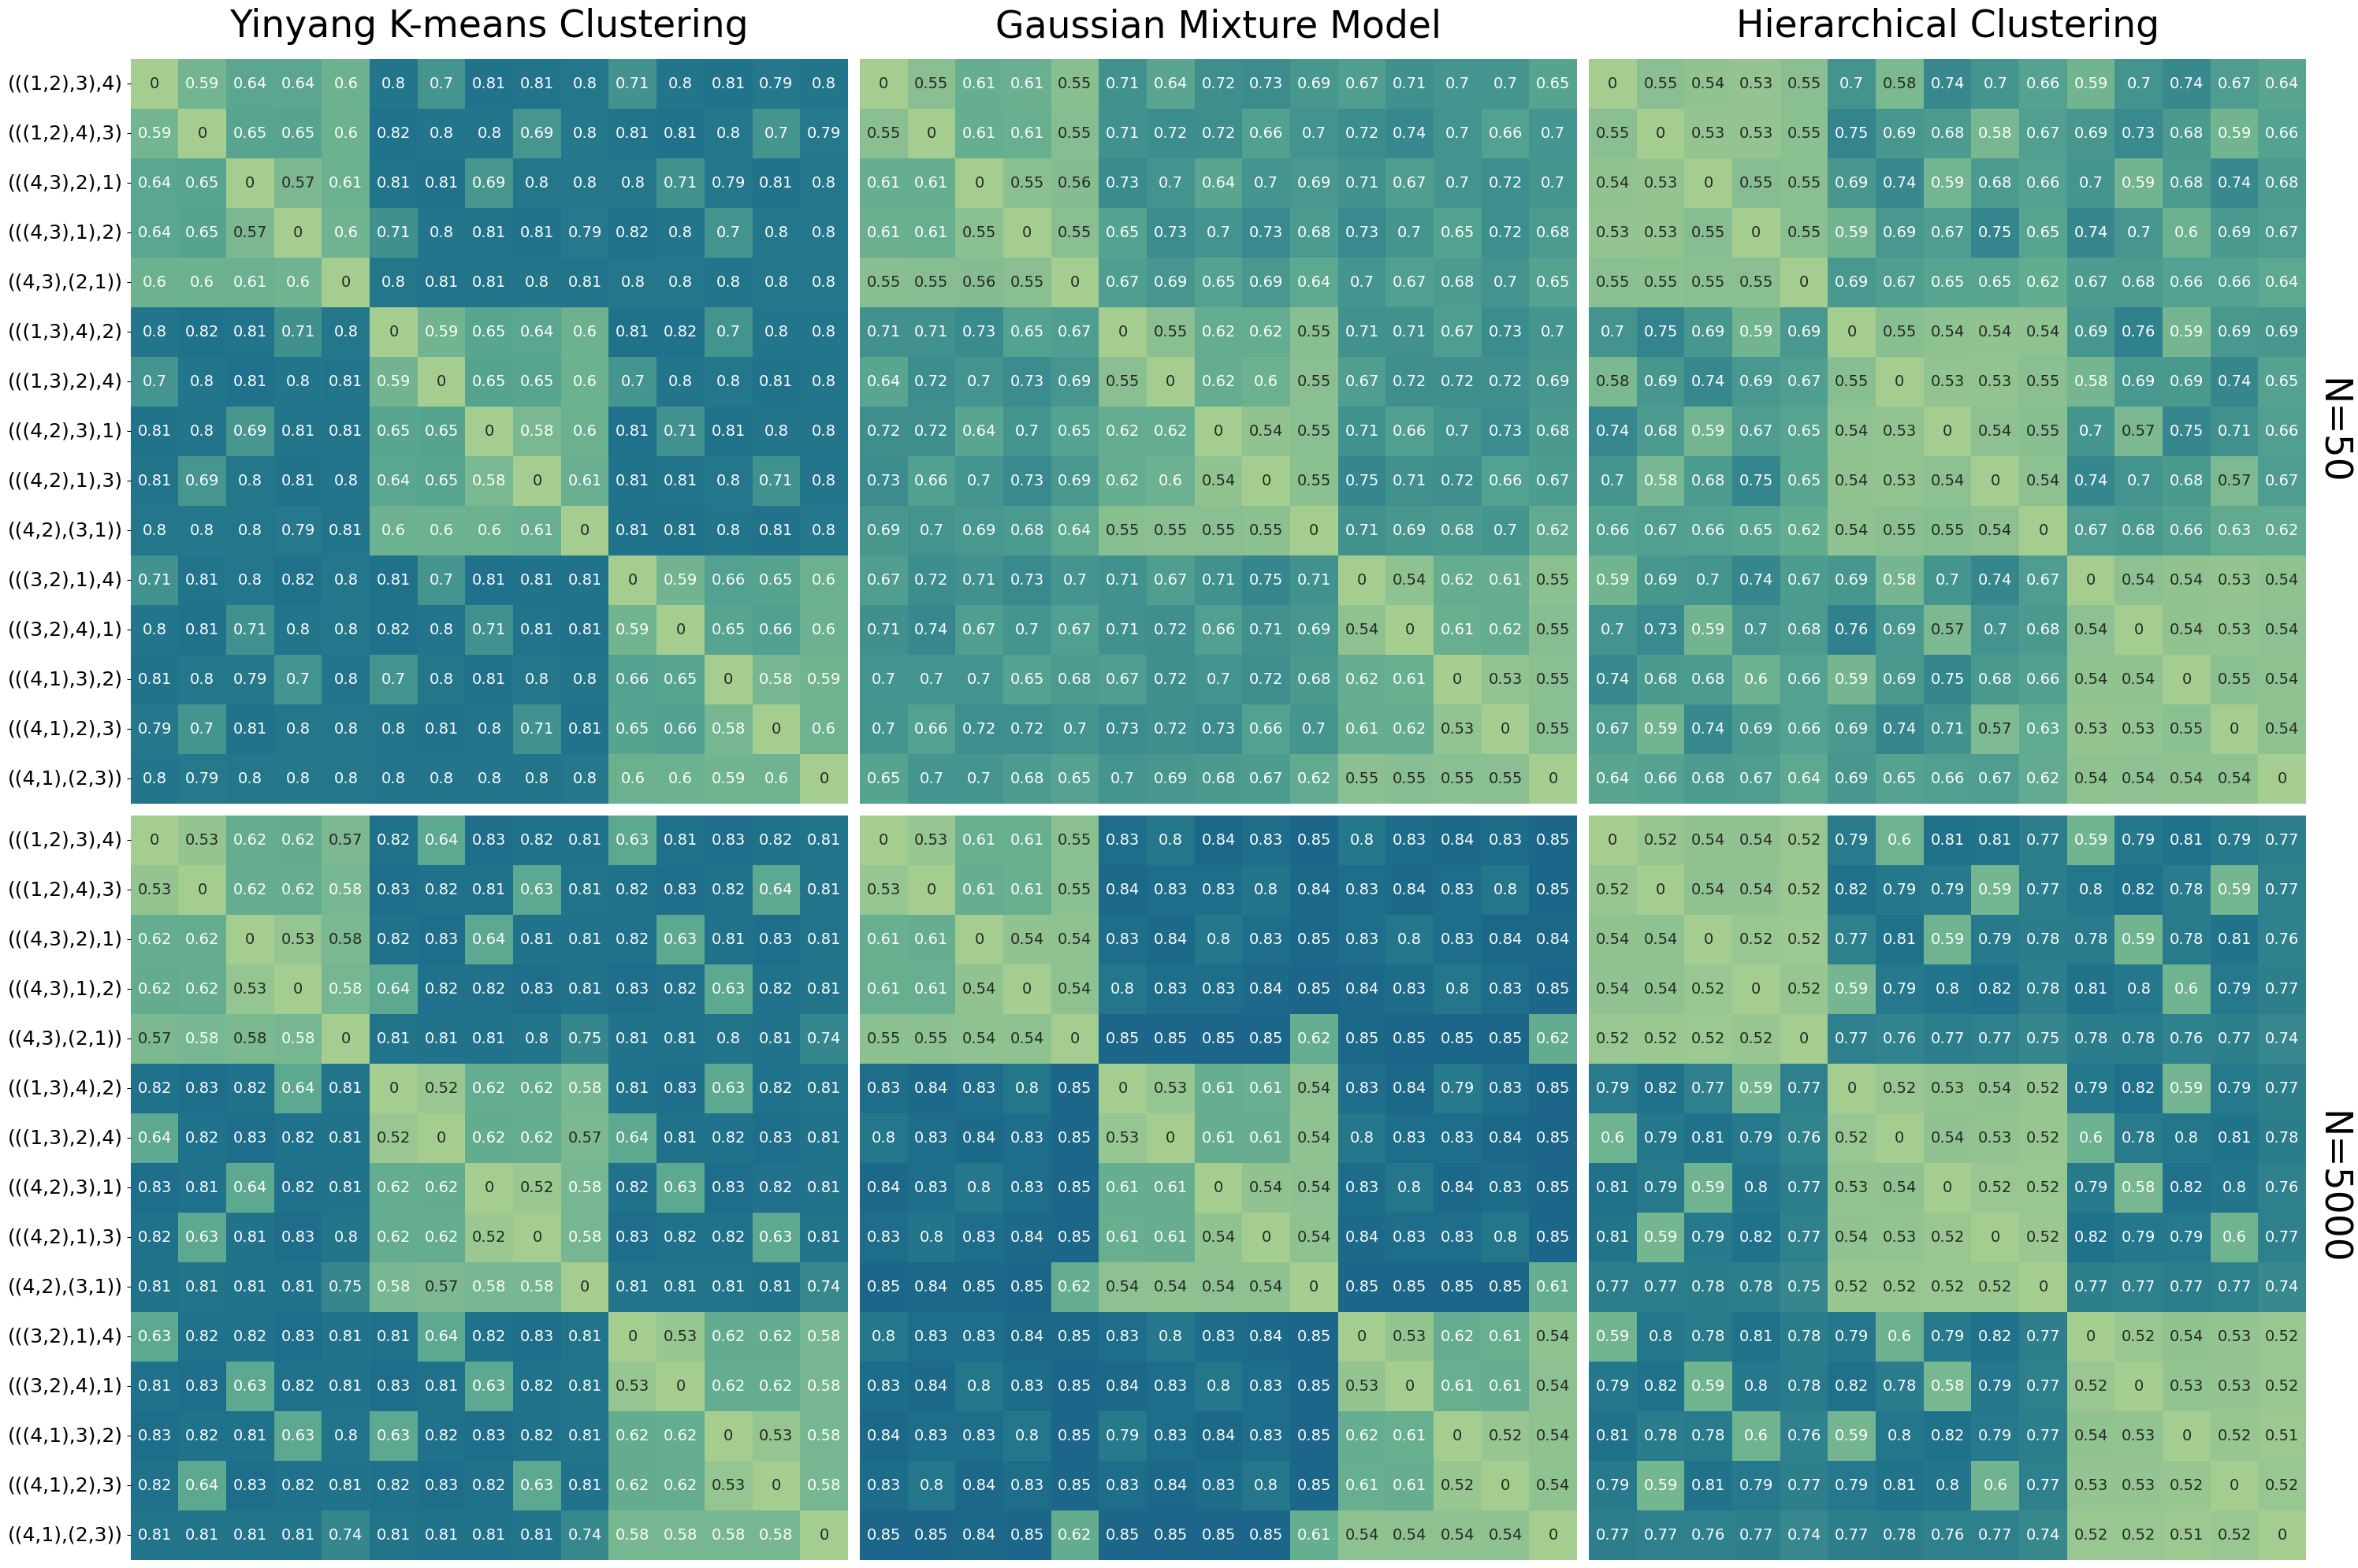

In [12]:
# Figure 1a
fig, ax = plt.subplots(2, 3, figsize=(30, 20))

df = pd.read_csv("../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

kmeans_50 = pd.DataFrame(accuracy)
kmeans_50.columns = trees
kmeans_50.index = trees
kmeans_50 = kmeans_50.reindex(labels = sortTree)
kmeans_50 = kmeans_50.reindex(columns = sortTree)

plot = sns.heatmap(kmeans_50, annot=True, cmap="crest",ax=ax[0, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":14});
plot.tick_params(axis='y', rotation=0, labelsize=18)
plot.set_title('Yinyang K-means Clustering', fontsize=34, pad=20)

df = pd.read_csv("../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

gmm_50 = pd.DataFrame(accuracy)
gmm_50.columns = trees
gmm_50.index = trees
gmm_50 = gmm_50.reindex(labels = sortTree)
gmm_50 = gmm_50.reindex(columns = sortTree)

plot = sns.heatmap(gmm_50, annot=True, cmap="crest",ax=ax[0, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});
plot.tick_params(axis='y', rotation=0)
plot.set_title('Gaussian Mixture Model', fontsize=34, pad=20)

df = pd.read_csv("../../data/result/4-taxon/same-topo/HC/hc_4taxa_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/HC/hc_4taxa_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

hc_50 = pd.DataFrame(accuracy)
hc_50.columns = trees
hc_50.index = trees
hc_50 = hc_50.reindex(labels = sortTree)
hc_50 = hc_50.reindex(columns = sortTree)

plot = sns.heatmap(hc_50, annot=True, cmap="crest",ax=ax[0, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});
plot.tick_params(axis='y', rotation=0)
plot.set_title('Hierarchical Clustering', fontsize=34, pad=20)


df = pd.read_csv("../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

kmeans_5000 = pd.DataFrame(accuracy)
kmeans_5000.columns = trees
kmeans_5000.index = trees
kmeans_5000 = kmeans_5000.reindex(labels = sortTree)
kmeans_5000 = kmeans_5000.reindex(columns = sortTree)

plot = sns.heatmap(kmeans_5000, annot=True, cmap="crest",ax=ax[1, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":14});
plot.tick_params(axis='y', rotation=0, labelsize=18)

df = pd.read_csv("../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

gmm_5000 = pd.DataFrame(accuracy)
gmm_5000.columns = trees
gmm_5000.index = trees
gmm_5000 = gmm_5000.reindex(labels = sortTree)
gmm_5000 = gmm_5000.reindex(columns = sortTree)

plot = sns.heatmap(gmm_5000, annot=True, cmap="crest",ax=ax[1, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});

df = pd.read_csv("../../data/result/4-taxon/same-topo/HC/hc_4taxa_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/HC/hc_4taxa_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

hc_5000 = pd.DataFrame(accuracy)
hc_5000.columns = trees
hc_5000.index = trees
hc_5000 = hc_5000.reindex(labels = sortTree)
hc_5000 = hc_5000.reindex(columns = sortTree)

plot = sns.heatmap(hc_5000, annot=True, cmap="crest",ax=ax[1, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});

ax[0, 2].text(1.01, 0.5, 'N=50', transform=ax[0, 2].transAxes, ha='left', va='center', fontsize=34, rotation = 270)
ax[1, 2].text(1.01, 0.5, 'N=5000', transform=ax[1, 2].transAxes, ha='left', va='center', fontsize=34, rotation = 270)
plt.tight_layout()


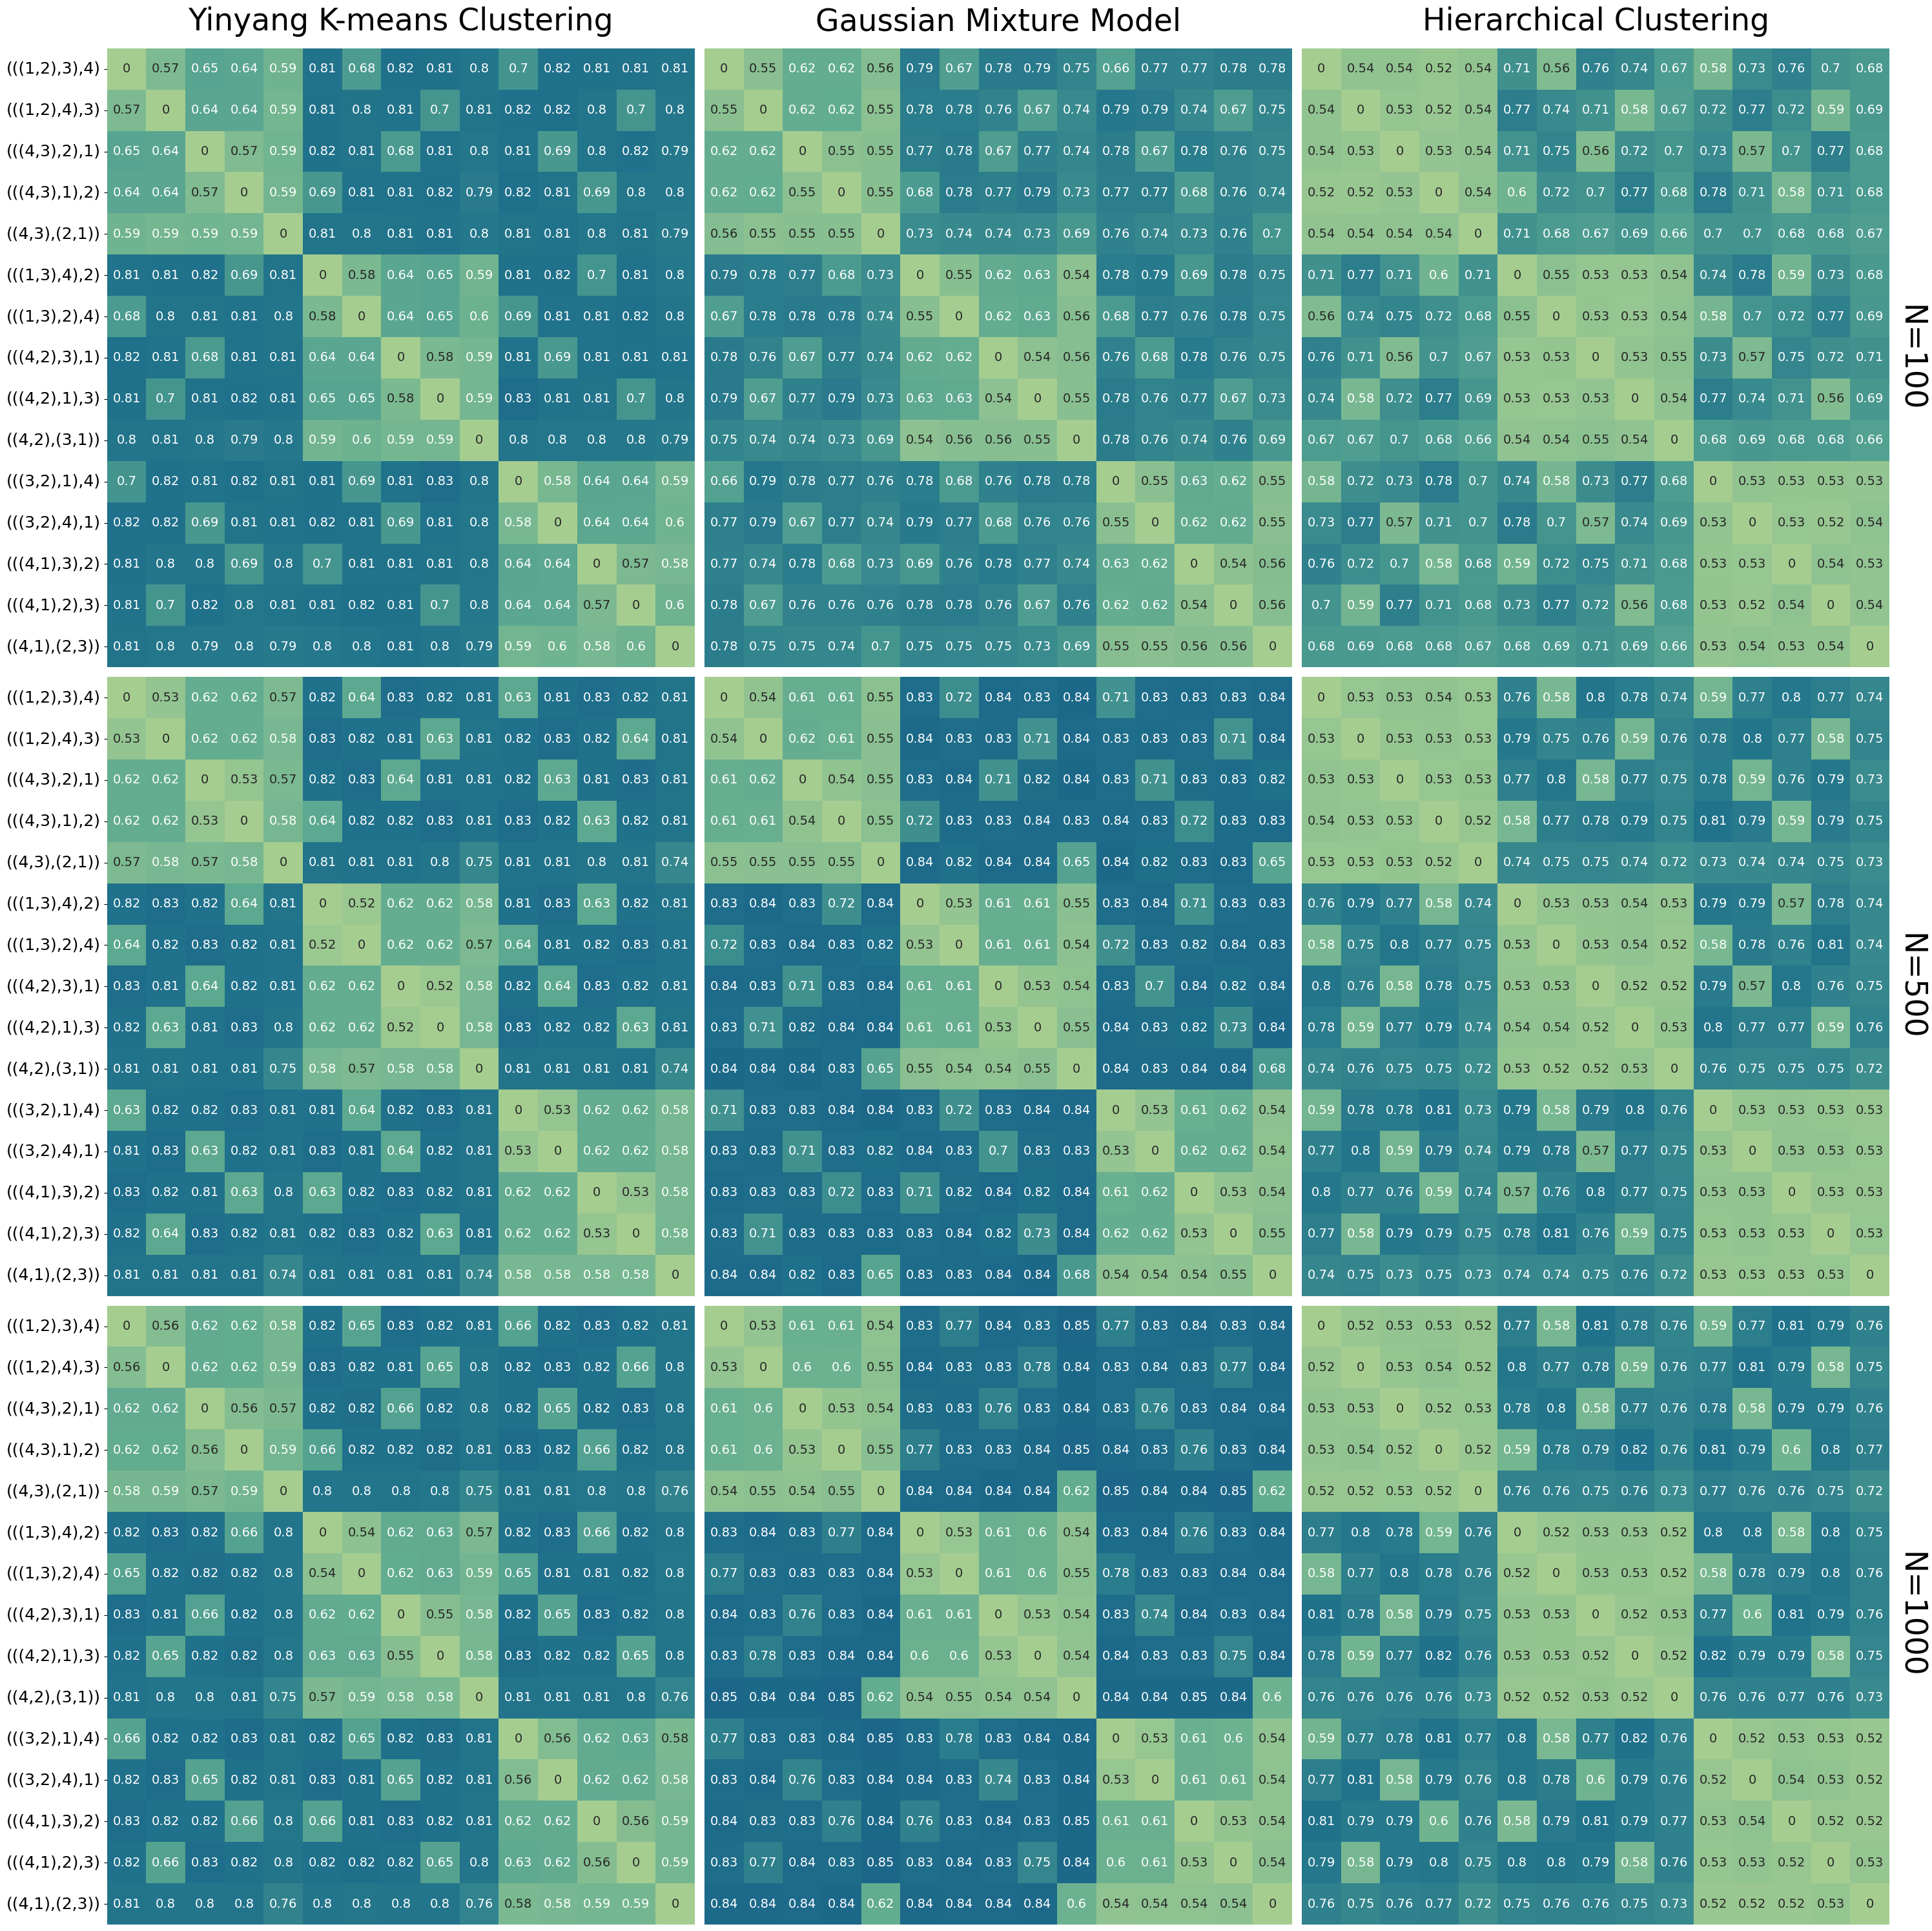

In [13]:
# Figure 1b
fig, ax = plt.subplots(3, 3, figsize=(30, 30))

df = pd.read_csv("../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

kmeans_100 = pd.DataFrame(accuracy)
kmeans_100.columns = trees
kmeans_100.index = trees
kmeans_100 = kmeans_100.reindex(labels = sortTree)
kmeans_100 = kmeans_100.reindex(columns = sortTree)

plot = sns.heatmap(kmeans_100, annot=True, cmap="crest",ax=ax[0, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":14});
plot.tick_params(axis='y', rotation=0, labelsize=18)
plot.set_title('Yinyang K-means Clustering', fontsize=34, pad=20)

df = pd.read_csv("../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

gmm_100 = pd.DataFrame(accuracy)
gmm_100.columns = trees
gmm_100.index = trees
gmm_100 = gmm_100.reindex(labels = sortTree)
gmm_100 = gmm_100.reindex(columns = sortTree)

plot = sns.heatmap(gmm_100, annot=True, cmap="crest",ax=ax[0, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});
plot.set_title('Gaussian Mixture Model', fontsize=34, pad=20)


df = pd.read_csv("../../data/result/4-taxon/same-topo/HC/hc_4taxa_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/HC/hc_4taxa_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

hc_100 = pd.DataFrame(accuracy)
hc_100.columns = trees
hc_100.index = trees
hc_100 = hc_100.reindex(labels = sortTree)
hc_100 = hc_100.reindex(columns = sortTree)

plot = sns.heatmap(hc_100, annot=True, cmap="crest",ax=ax[0, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});
plot.set_title('Hierarchical Clustering', fontsize=34, pad=20)


df = pd.read_csv("../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

kmeans_500 = pd.DataFrame(accuracy)
kmeans_500.columns = trees
kmeans_500.index = trees
kmeans_500 = kmeans_500.reindex(labels = sortTree)
kmeans_500 = kmeans_500.reindex(columns = sortTree)

plot = sns.heatmap(kmeans_500, annot=True, cmap="crest",ax=ax[1, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":14});
plot.tick_params(axis='y', rotation=0, labelsize=18)

df = pd.read_csv("../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

gmm_500 = pd.DataFrame(accuracy)
gmm_500.columns = trees
gmm_500.index = trees
gmm_500 = gmm_500.reindex(labels = sortTree)
gmm_500 = gmm_500.reindex(columns = sortTree)

plot = sns.heatmap(gmm_500, annot=True, cmap="crest",ax=ax[1, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});

df = pd.read_csv("../../data/result/4-taxon/same-topo/HC/hc_4taxa_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/HC/hc_4taxa_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

hc_500 = pd.DataFrame(accuracy)
hc_500.columns = trees
hc_500.index = trees
hc_500 = hc_500.reindex(labels = sortTree)
hc_500 = hc_500.reindex(columns = sortTree)

plot = sns.heatmap(hc_500, annot=True, cmap="crest",ax=ax[1, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});

df = pd.read_csv("../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

kmeans_1000 = pd.DataFrame(accuracy)
kmeans_1000.columns = trees
kmeans_1000.index = trees
kmeans_1000 = kmeans_1000.reindex(labels = sortTree)
kmeans_1000 = kmeans_1000.reindex(columns = sortTree)

plot = sns.heatmap(kmeans_1000, annot=True, cmap="crest",ax=ax[2, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":14});
plot.tick_params(axis='y', rotation=0, labelsize=18)

df = pd.read_csv("../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

gmm_1000 = pd.DataFrame(accuracy)
gmm_1000.columns = trees
gmm_1000.index = trees
gmm_1000 = gmm_1000.reindex(labels = sortTree)
gmm_1000 = gmm_1000.reindex(columns = sortTree)

plot = sns.heatmap(gmm_1000, annot=True, cmap="crest",ax=ax[2, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});

df = pd.read_csv("../../data/result/4-taxon/same-topo/HC/hc_4taxa_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/same-topo/HC/hc_4taxa_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

hc_1000 = pd.DataFrame(accuracy)
hc_1000.columns = trees
hc_1000.index = trees
hc_1000 = hc_1000.reindex(labels = sortTree)
hc_1000 = hc_1000.reindex(columns = sortTree)

plot = sns.heatmap(hc_1000, annot=True, cmap="crest",ax=ax[2, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});

ax[0, 2].text(1.01, 0.5, 'N=100', transform=ax[0, 2].transAxes, ha='left', va='center', fontsize=34, rotation = 270)
ax[1, 2].text(1.01, 0.5, 'N=500', transform=ax[1, 2].transAxes, ha='left', va='center', fontsize=34, rotation = 270)
ax[2, 2].text(1.01, 0.5, 'N=1000', transform=ax[2, 2].transAxes, ha='left', va='center', fontsize=34, rotation = 270)
plt.tight_layout()

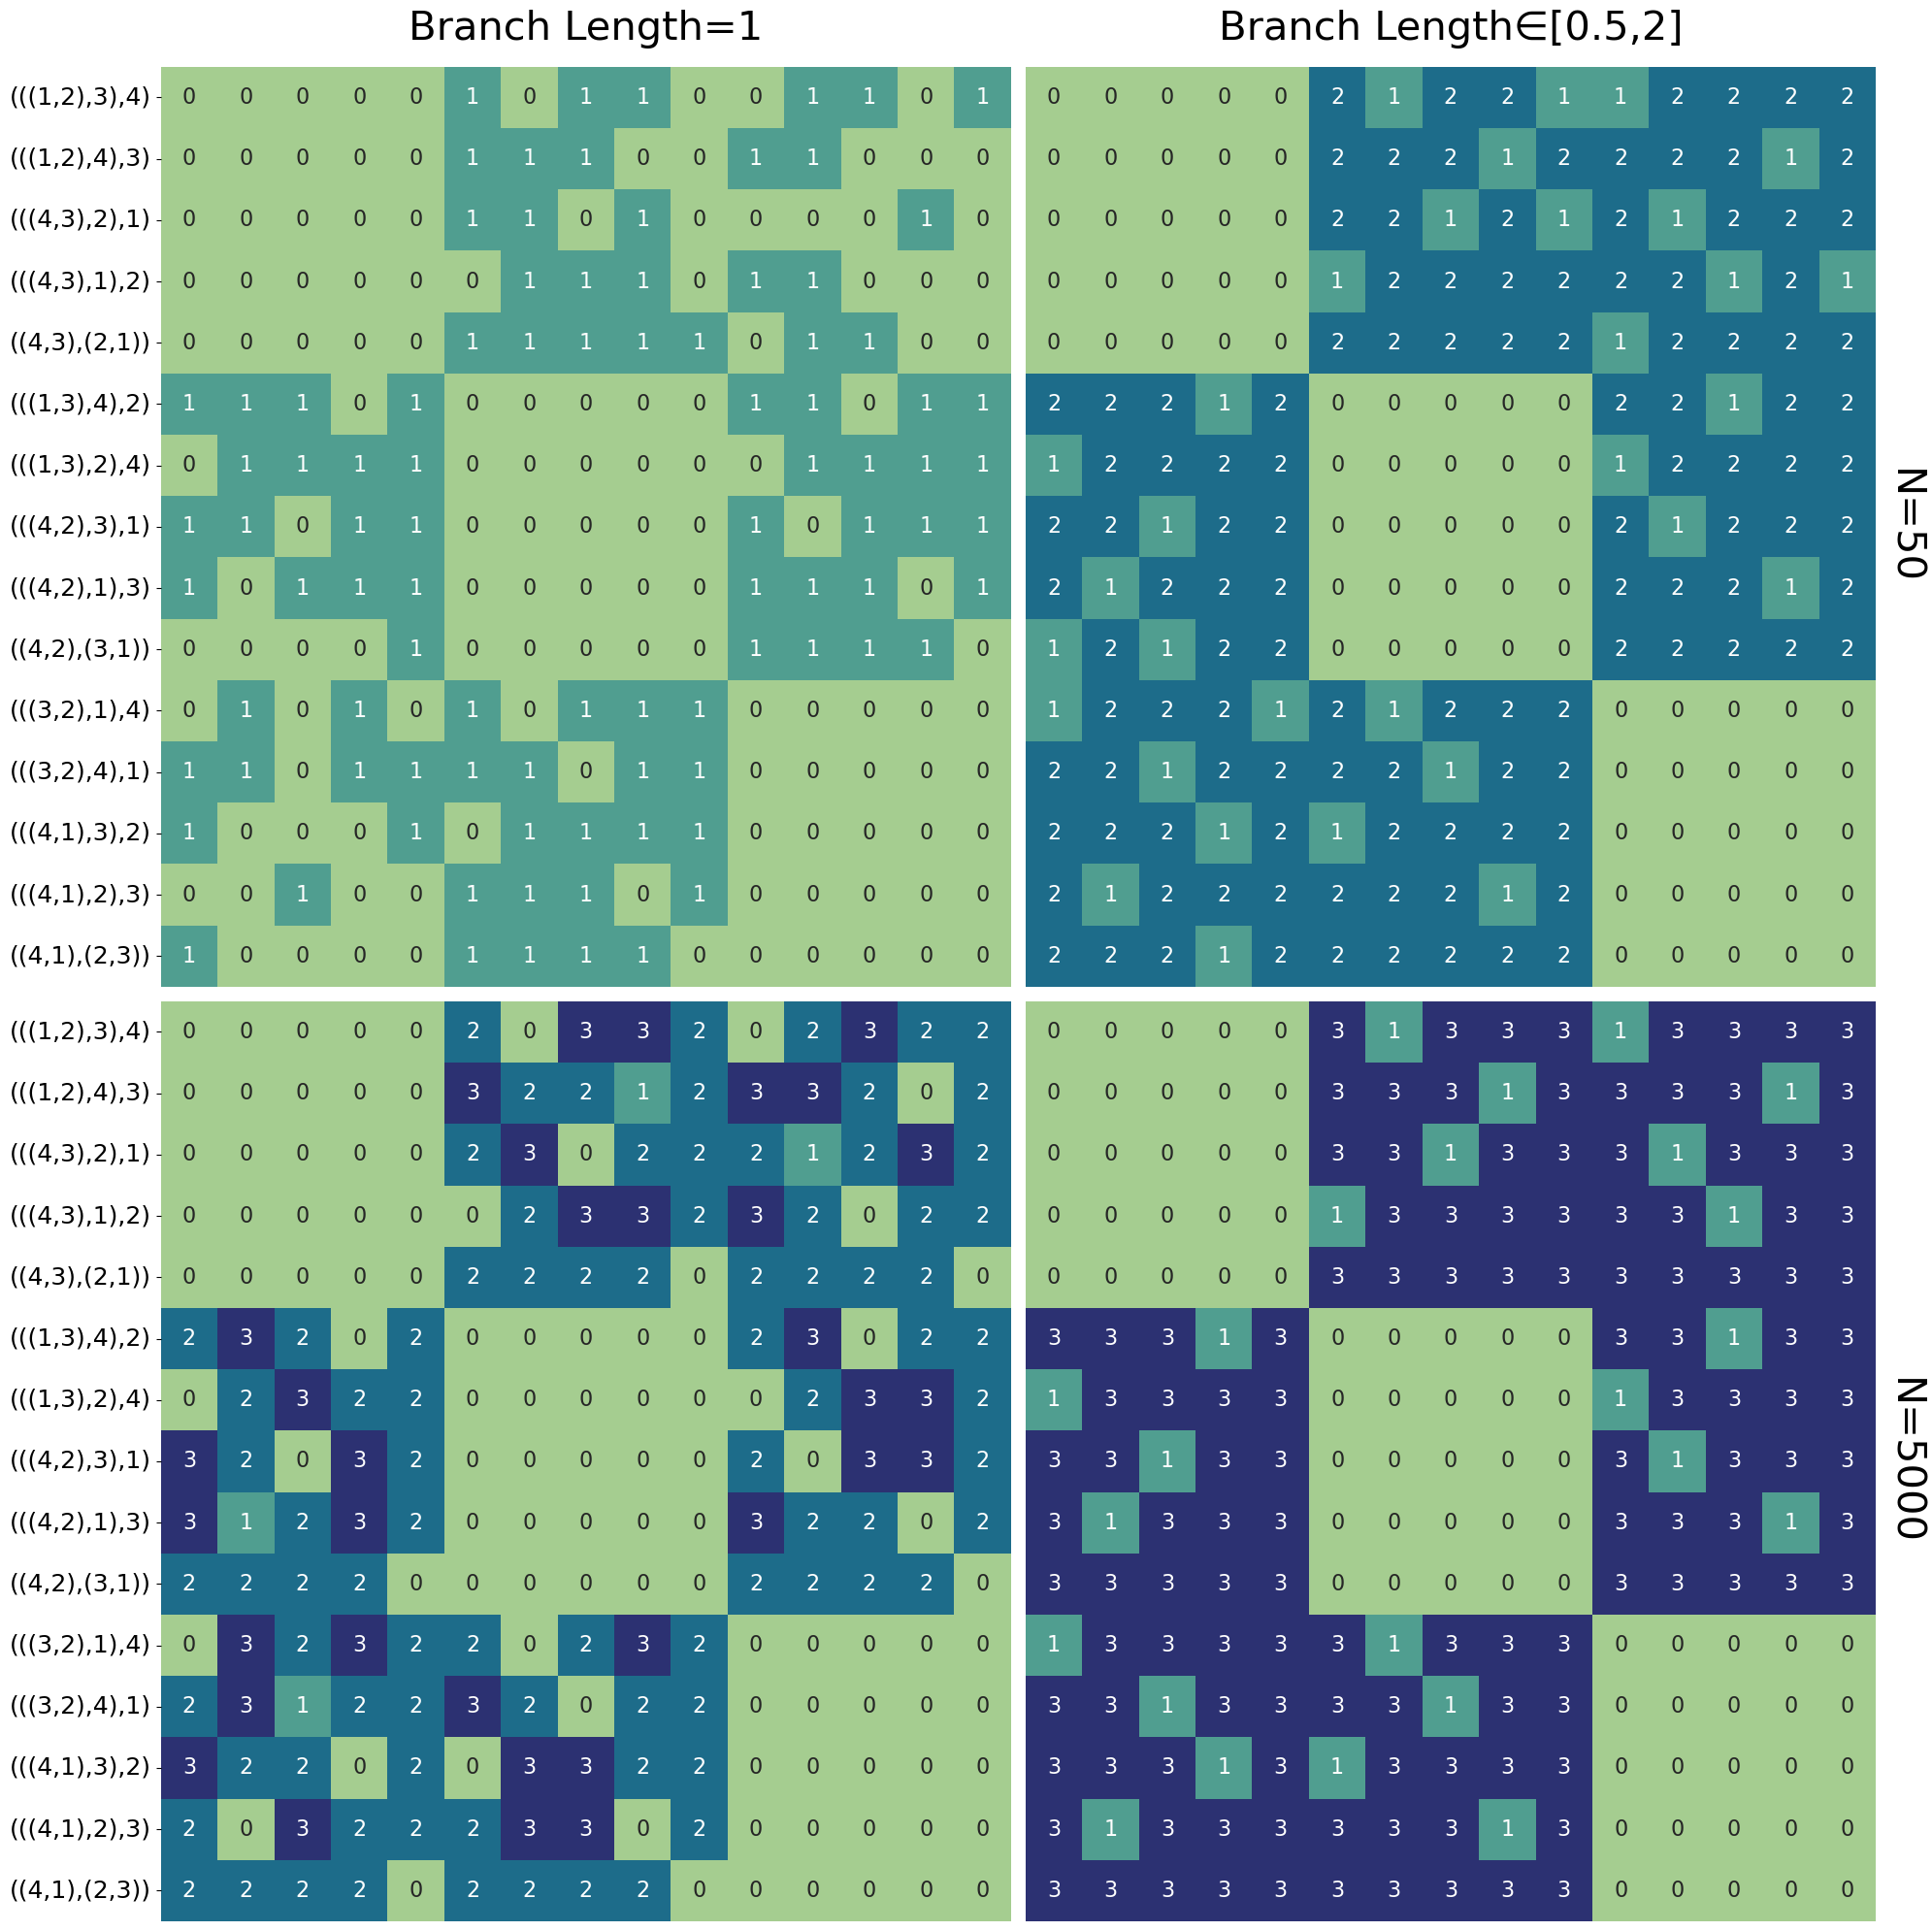

In [14]:
# Figure 2a
fig, ax = plt.subplots(2, 2, figsize=(20, 20))


result_kmeans = kmeans_50.to_numpy()
result_gmm = gmm_50.to_numpy()
result_hc = hc_50.to_numpy()

        
matrix = [[0 for x in range(15)] for y in range(15)] 

for i in range(15):
    for j in range(15):
        if result_kmeans[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_gmm[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_hc[i][j] >= 0.8:
            matrix[i][j] += 1

matrix = pd.DataFrame(matrix)
matrix.index = sortTree
plot = sns.heatmap(matrix, annot=True, cmap="crest",ax=ax[0, 0], vmin = 0, vmax = 3, cbar=False, xticklabels=False, annot_kws={"fontsize":16});
plot.set_title('Branch Length=1', fontsize=30, pad=20)
plot.tick_params(axis='y', rotation=0, labelsize=18)
            
result_kmeans = kmeans_5000.to_numpy()
result_gmm = gmm_5000.to_numpy()
result_hc = hc_5000.to_numpy()

        
matrix = [[0 for x in range(15)] for y in range(15)] 

for i in range(15):
    for j in range(15):
        if result_kmeans[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_gmm[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_hc[i][j] >= 0.8:
            matrix[i][j] += 1
            
matrix = pd.DataFrame(matrix)
matrix.index = sortTree
plot = sns.heatmap(matrix, annot=True, cmap="crest",ax=ax[1, 0], vmin = 0, vmax = 3, cbar=False, xticklabels=False, annot_kws={"fontsize":16});
plot.tick_params(axis='y', rotation=0, labelsize=18)


df = pd.read_csv("../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

kmeans_50 = pd.DataFrame(accuracy)
kmeans_50.columns = trees
kmeans_50.index = trees
kmeans_50 = kmeans_50.reindex(labels = sortTree)
kmeans_50 = kmeans_50.reindex(columns = sortTree)

df = pd.read_csv("../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

gmm_50 = pd.DataFrame(accuracy)
gmm_50.columns = trees
gmm_50.index = trees
gmm_50 = gmm_50.reindex(labels = sortTree)
gmm_50 = gmm_50.reindex(columns = sortTree)

df = pd.read_csv("../../data/result/4-taxon/diff-topo/hc/hc_4_diff_topo_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/hc/hc_4_diff_topo_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

hc_50 = pd.DataFrame(accuracy)
hc_50.columns = trees
hc_50.index = trees
hc_50 = hc_50.reindex(labels = sortTree)
hc_50 = hc_50.reindex(columns = sortTree)


result_kmeans = kmeans_50.to_numpy()
result_gmm = gmm_50.to_numpy()
result_hc = hc_50.to_numpy()

        
matrix = [[0 for x in range(15)] for y in range(15)] 

for i in range(15):
    for j in range(15):
        if result_kmeans[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_gmm[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_hc[i][j] >= 0.8:
            matrix[i][j] += 1

matrix = pd.DataFrame(matrix)
matrix.index = sortTree
plot = sns.heatmap(matrix, annot=True, cmap="crest",ax=ax[0, 1], vmin = 0, vmax = 3, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":16});
plot.set_title('Branch Length∈[0.5,2]', fontsize=30, pad=20)
plot.tick_params(axis='y', rotation=0, labelsize=18)


df = pd.read_csv("../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

kmeans_5000 = pd.DataFrame(accuracy)
kmeans_5000.columns = trees
kmeans_5000.index = trees
kmeans_5000 = kmeans_5000.reindex(labels = sortTree)
kmeans_5000 = kmeans_5000.reindex(columns = sortTree)

df = pd.read_csv("../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

gmm_5000 = pd.DataFrame(accuracy)
gmm_5000.columns = trees
gmm_5000.index = trees
gmm_5000 = gmm_5000.reindex(labels = sortTree)
gmm_5000 = gmm_5000.reindex(columns = sortTree)

df = pd.read_csv("../../data/result/4-taxon/diff-topo/hc/hc_4_diff_topo_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/hc/hc_4_diff_topo_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

hc_5000 = pd.DataFrame(accuracy)
hc_5000.columns = trees
hc_5000.index = trees
hc_5000 = hc_5000.reindex(labels = sortTree)
hc_5000 = hc_5000.reindex(columns = sortTree)

result_kmeans = kmeans_5000.to_numpy()
result_gmm = gmm_5000.to_numpy()
result_hc = hc_5000.to_numpy()

        
matrix = [[0 for x in range(15)] for y in range(15)] 

for i in range(15):
    for j in range(15):
        if result_kmeans[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_gmm[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_hc[i][j] >= 0.8:
            matrix[i][j] += 1
            
matrix = pd.DataFrame(matrix)
matrix.index = sortTree
plot = sns.heatmap(matrix, annot=True, cmap="crest",ax=ax[1, 1], vmin = 0, vmax = 3, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":16});
plot.tick_params(axis='y', rotation=0, labelsize=18)

ax[0, 1].text(1.01, 0.5, 'N=50', transform=ax[0, 1].transAxes, ha='left', va='center', fontsize=30, rotation = 270)
ax[1, 1].text(1.01, 0.5, 'N=5000', transform=ax[1, 1].transAxes, ha='left', va='center', fontsize=30, rotation = 270)
plt.tight_layout()

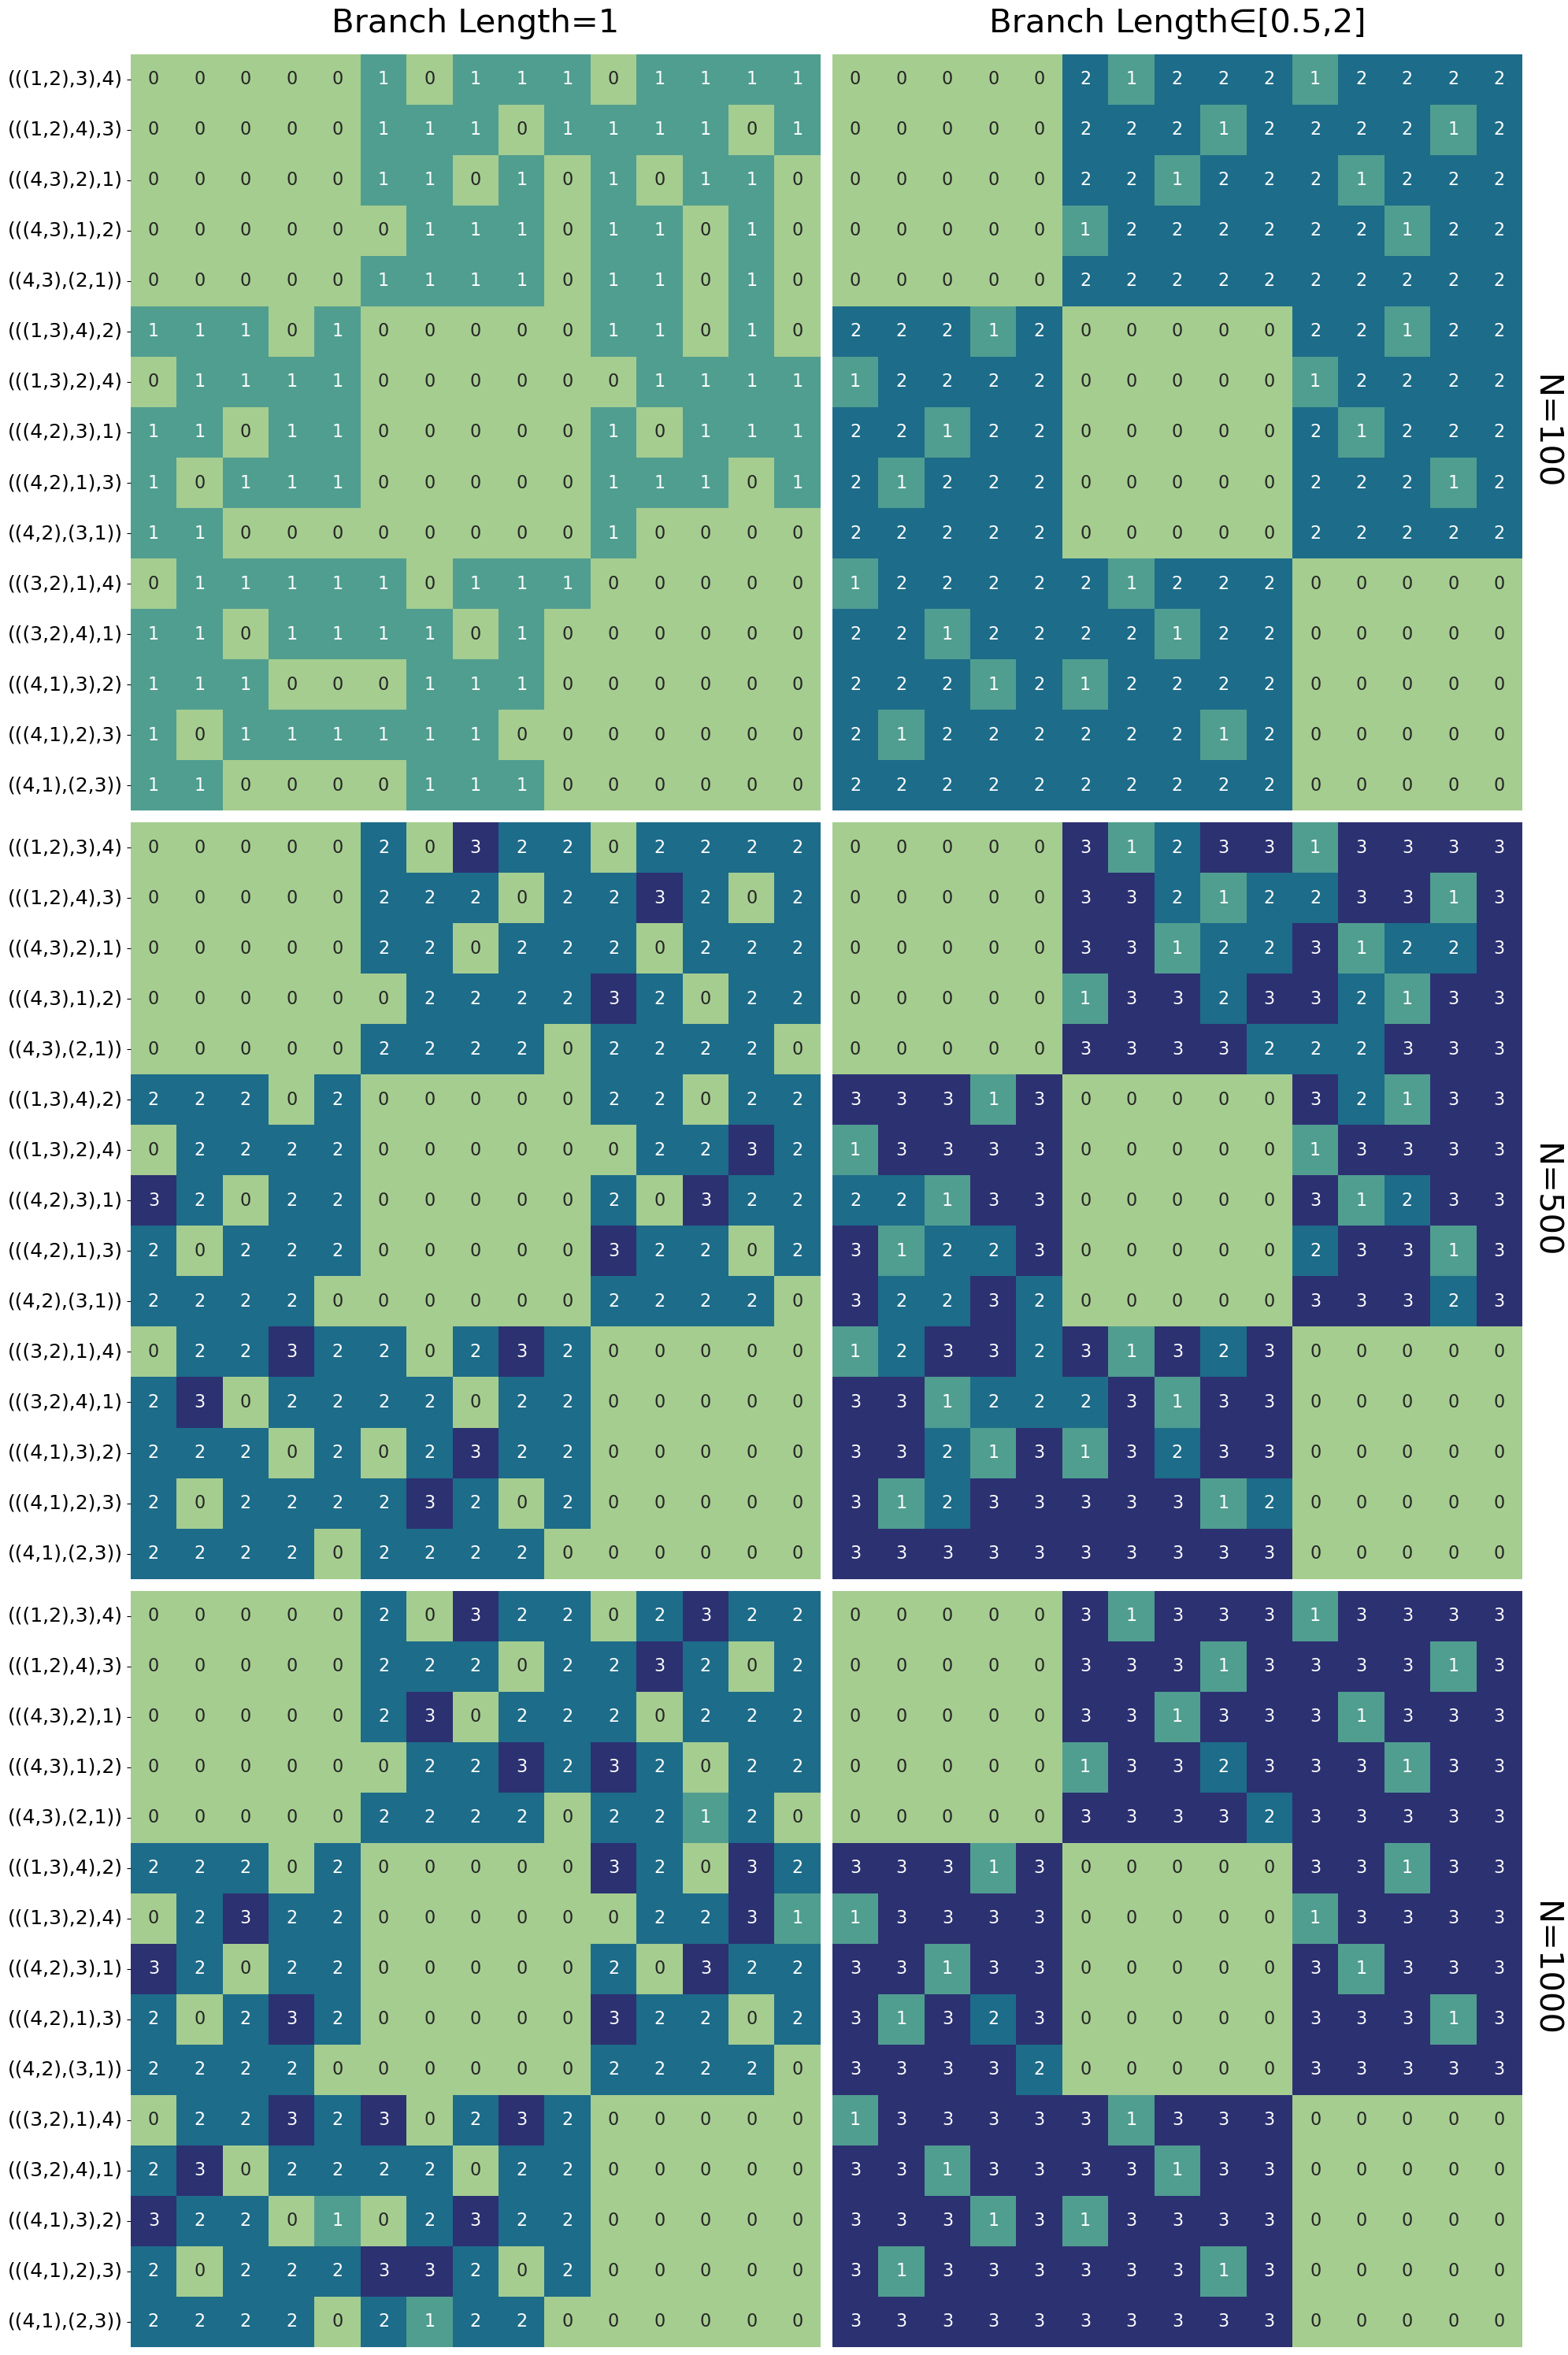

In [7]:
# Figure 2b
fig, ax = plt.subplots(3, 2, figsize=(20, 30))

result_kmeans = kmeans_100.to_numpy()
result_gmm = gmm_100.to_numpy()
result_hc = hc_100.to_numpy()

        
matrix = [[0 for x in range(15)] for y in range(15)] 

for i in range(15):
    for j in range(15):
        if result_kmeans[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_gmm[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_hc[i][j] >= 0.8:
            matrix[i][j] += 1

matrix = pd.DataFrame(matrix)
matrix.index = sortTree
plot = sns.heatmap(matrix, annot=True, cmap="crest",ax=ax[0, 0], vmin = 0, vmax = 3, cbar=False, xticklabels=False, annot_kws={"fontsize":16});
plot.set_title('Branch Length=1', fontsize=30, pad=20)
plot.tick_params(axis='y', rotation=0, labelsize=18)

result_kmeans = kmeans_500.to_numpy()
result_gmm = gmm_500.to_numpy()
result_hc = hc_500.to_numpy()

        
matrix = [[0 for x in range(15)] for y in range(15)] 

for i in range(15):
    for j in range(15):
        if result_kmeans[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_gmm[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_hc[i][j] >= 0.8:
            matrix[i][j] += 1

matrix = pd.DataFrame(matrix)
matrix.index = sortTree
plot = sns.heatmap(matrix, annot=True, cmap="crest",ax=ax[1, 0], vmin = 0, vmax = 3, cbar=False, xticklabels=False, annot_kws={"fontsize":16});
plot.tick_params(axis='y', rotation=0, labelsize=18)
            
result_kmeans = kmeans_1000.to_numpy()
result_gmm = gmm_1000.to_numpy()
result_hc = hc_1000.to_numpy()

        
matrix = [[0 for x in range(15)] for y in range(15)] 

for i in range(15):
    for j in range(15):
        if result_kmeans[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_gmm[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_hc[i][j] >= 0.8:
            matrix[i][j] += 1
            
matrix = pd.DataFrame(matrix)
matrix.index = sortTree
plot = sns.heatmap(matrix, annot=True, cmap="crest",ax=ax[2, 0], vmin = 0, vmax = 3, cbar=False, xticklabels=False, annot_kws={"fontsize":16});
plot.tick_params(axis='y', rotation=0, labelsize=18)


df = pd.read_csv("../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

kmeans_100 = pd.DataFrame(accuracy)
kmeans_100.columns = trees
kmeans_100.index = trees
kmeans_100 = kmeans_100.reindex(labels = sortTree)
kmeans_100 = kmeans_100.reindex(columns = sortTree)

df = pd.read_csv("../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

gmm_100 = pd.DataFrame(accuracy)
gmm_100.columns = trees
gmm_100.index = trees
gmm_100 = gmm_100.reindex(labels = sortTree)
gmm_100 = gmm_100.reindex(columns = sortTree)

df = pd.read_csv("../../data/result/4-taxon/diff-topo/hc/hc_4_diff_topo_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/hc/hc_4_diff_topo_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

hc_100 = pd.DataFrame(accuracy)
hc_100.columns = trees
hc_100.index = trees
hc_100 = hc_100.reindex(labels = sortTree)
hc_100 = hc_100.reindex(columns = sortTree)


result_kmeans = kmeans_100.to_numpy()
result_gmm = gmm_100.to_numpy()
result_hc = hc_100.to_numpy()

        
matrix = [[0 for x in range(15)] for y in range(15)] 

for i in range(15):
    for j in range(15):
        if result_kmeans[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_gmm[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_hc[i][j] >= 0.8:
            matrix[i][j] += 1

matrix = pd.DataFrame(matrix)
matrix.index = sortTree
plot = sns.heatmap(matrix, annot=True, cmap="crest",ax=ax[0, 1], vmin = 0, vmax = 3, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":16});
plot.set_title('Branch Length∈[0.5,2]', fontsize=30, pad=20)
plot.tick_params(axis='y', rotation=0, labelsize=18)


df = pd.read_csv("../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

kmeans_500 = pd.DataFrame(accuracy)
kmeans_500.columns = trees
kmeans_500.index = trees
kmeans_500 = kmeans_500.reindex(labels = sortTree)
kmeans_500 = kmeans_500.reindex(columns = sortTree)

df = pd.read_csv("../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

gmm_500 = pd.DataFrame(accuracy)
gmm_500.columns = trees
gmm_500.index = trees
gmm_500 = gmm_500.reindex(labels = sortTree)
gmm_500 = gmm_500.reindex(columns = sortTree)

df = pd.read_csv("../../data/result/4-taxon/diff-topo/hc/hc_4_diff_topo_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/hc/hc_4_diff_topo_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

hc_500 = pd.DataFrame(accuracy)
hc_500.columns = trees
hc_500.index = trees
hc_500 = hc_500.reindex(labels = sortTree)
hc_500 = hc_500.reindex(columns = sortTree)


result_kmeans = kmeans_500.to_numpy()
result_gmm = gmm_500.to_numpy()
result_hc = hc_500.to_numpy()

        
matrix = [[0 for x in range(15)] for y in range(15)] 

for i in range(15):
    for j in range(15):
        if result_kmeans[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_gmm[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_hc[i][j] >= 0.8:
            matrix[i][j] += 1

matrix = pd.DataFrame(matrix)
matrix.index = sortTree
plot = sns.heatmap(matrix, annot=True, cmap="crest",ax=ax[1, 1], vmin = 0, vmax = 3, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":16});
plot.tick_params(axis='y', rotation=0, labelsize=18)


df = pd.read_csv("../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

kmeans_1000 = pd.DataFrame(accuracy)
kmeans_1000.columns = trees
kmeans_1000.index = trees
kmeans_1000 = kmeans_1000.reindex(labels = sortTree)
kmeans_1000 = kmeans_1000.reindex(columns = sortTree)

df = pd.read_csv("../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

gmm_1000 = pd.DataFrame(accuracy)
gmm_1000.columns = trees
gmm_1000.index = trees
gmm_1000 = gmm_1000.reindex(labels = sortTree)
gmm_1000 = gmm_1000.reindex(columns = sortTree)

df = pd.read_csv("../../data/result/4-taxon/diff-topo/hc/hc_4_diff_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/diff-topo/hc/hc_4_diff_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100

hc_1000 = pd.DataFrame(accuracy)
hc_1000.columns = trees
hc_1000.index = trees
hc_1000 = hc_1000.reindex(labels = sortTree)
hc_1000 = hc_1000.reindex(columns = sortTree)

result_kmeans = kmeans_1000.to_numpy()
result_gmm = gmm_1000.to_numpy()
result_hc = hc_1000.to_numpy()

        
matrix = [[0 for x in range(15)] for y in range(15)] 

for i in range(15):
    for j in range(15):
        if result_kmeans[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_gmm[i][j] >= 0.8:
            matrix[i][j] += 1
        if result_hc[i][j] >= 0.8:
            matrix[i][j] += 1
            
matrix = pd.DataFrame(matrix)
matrix.index = sortTree
plot = sns.heatmap(matrix, annot=True, cmap="crest",ax=ax[2, 1], vmin = 0, vmax = 3, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":16});
plot.tick_params(axis='y', rotation=0, labelsize=18)

ax[0, 1].text(1.01, 0.5, 'N=100', transform=ax[0, 1].transAxes, ha='left', va='center', fontsize=30, rotation = 270)
ax[1, 1].text(1.01, 0.5, 'N=500', transform=ax[1, 1].transAxes, ha='left', va='center', fontsize=30, rotation = 270)
ax[2, 1].text(1.01, 0.5, 'N=1000', transform=ax[2, 1].transAxes, ha='left', va='center', fontsize=30, rotation = 270)
plt.tight_layout()


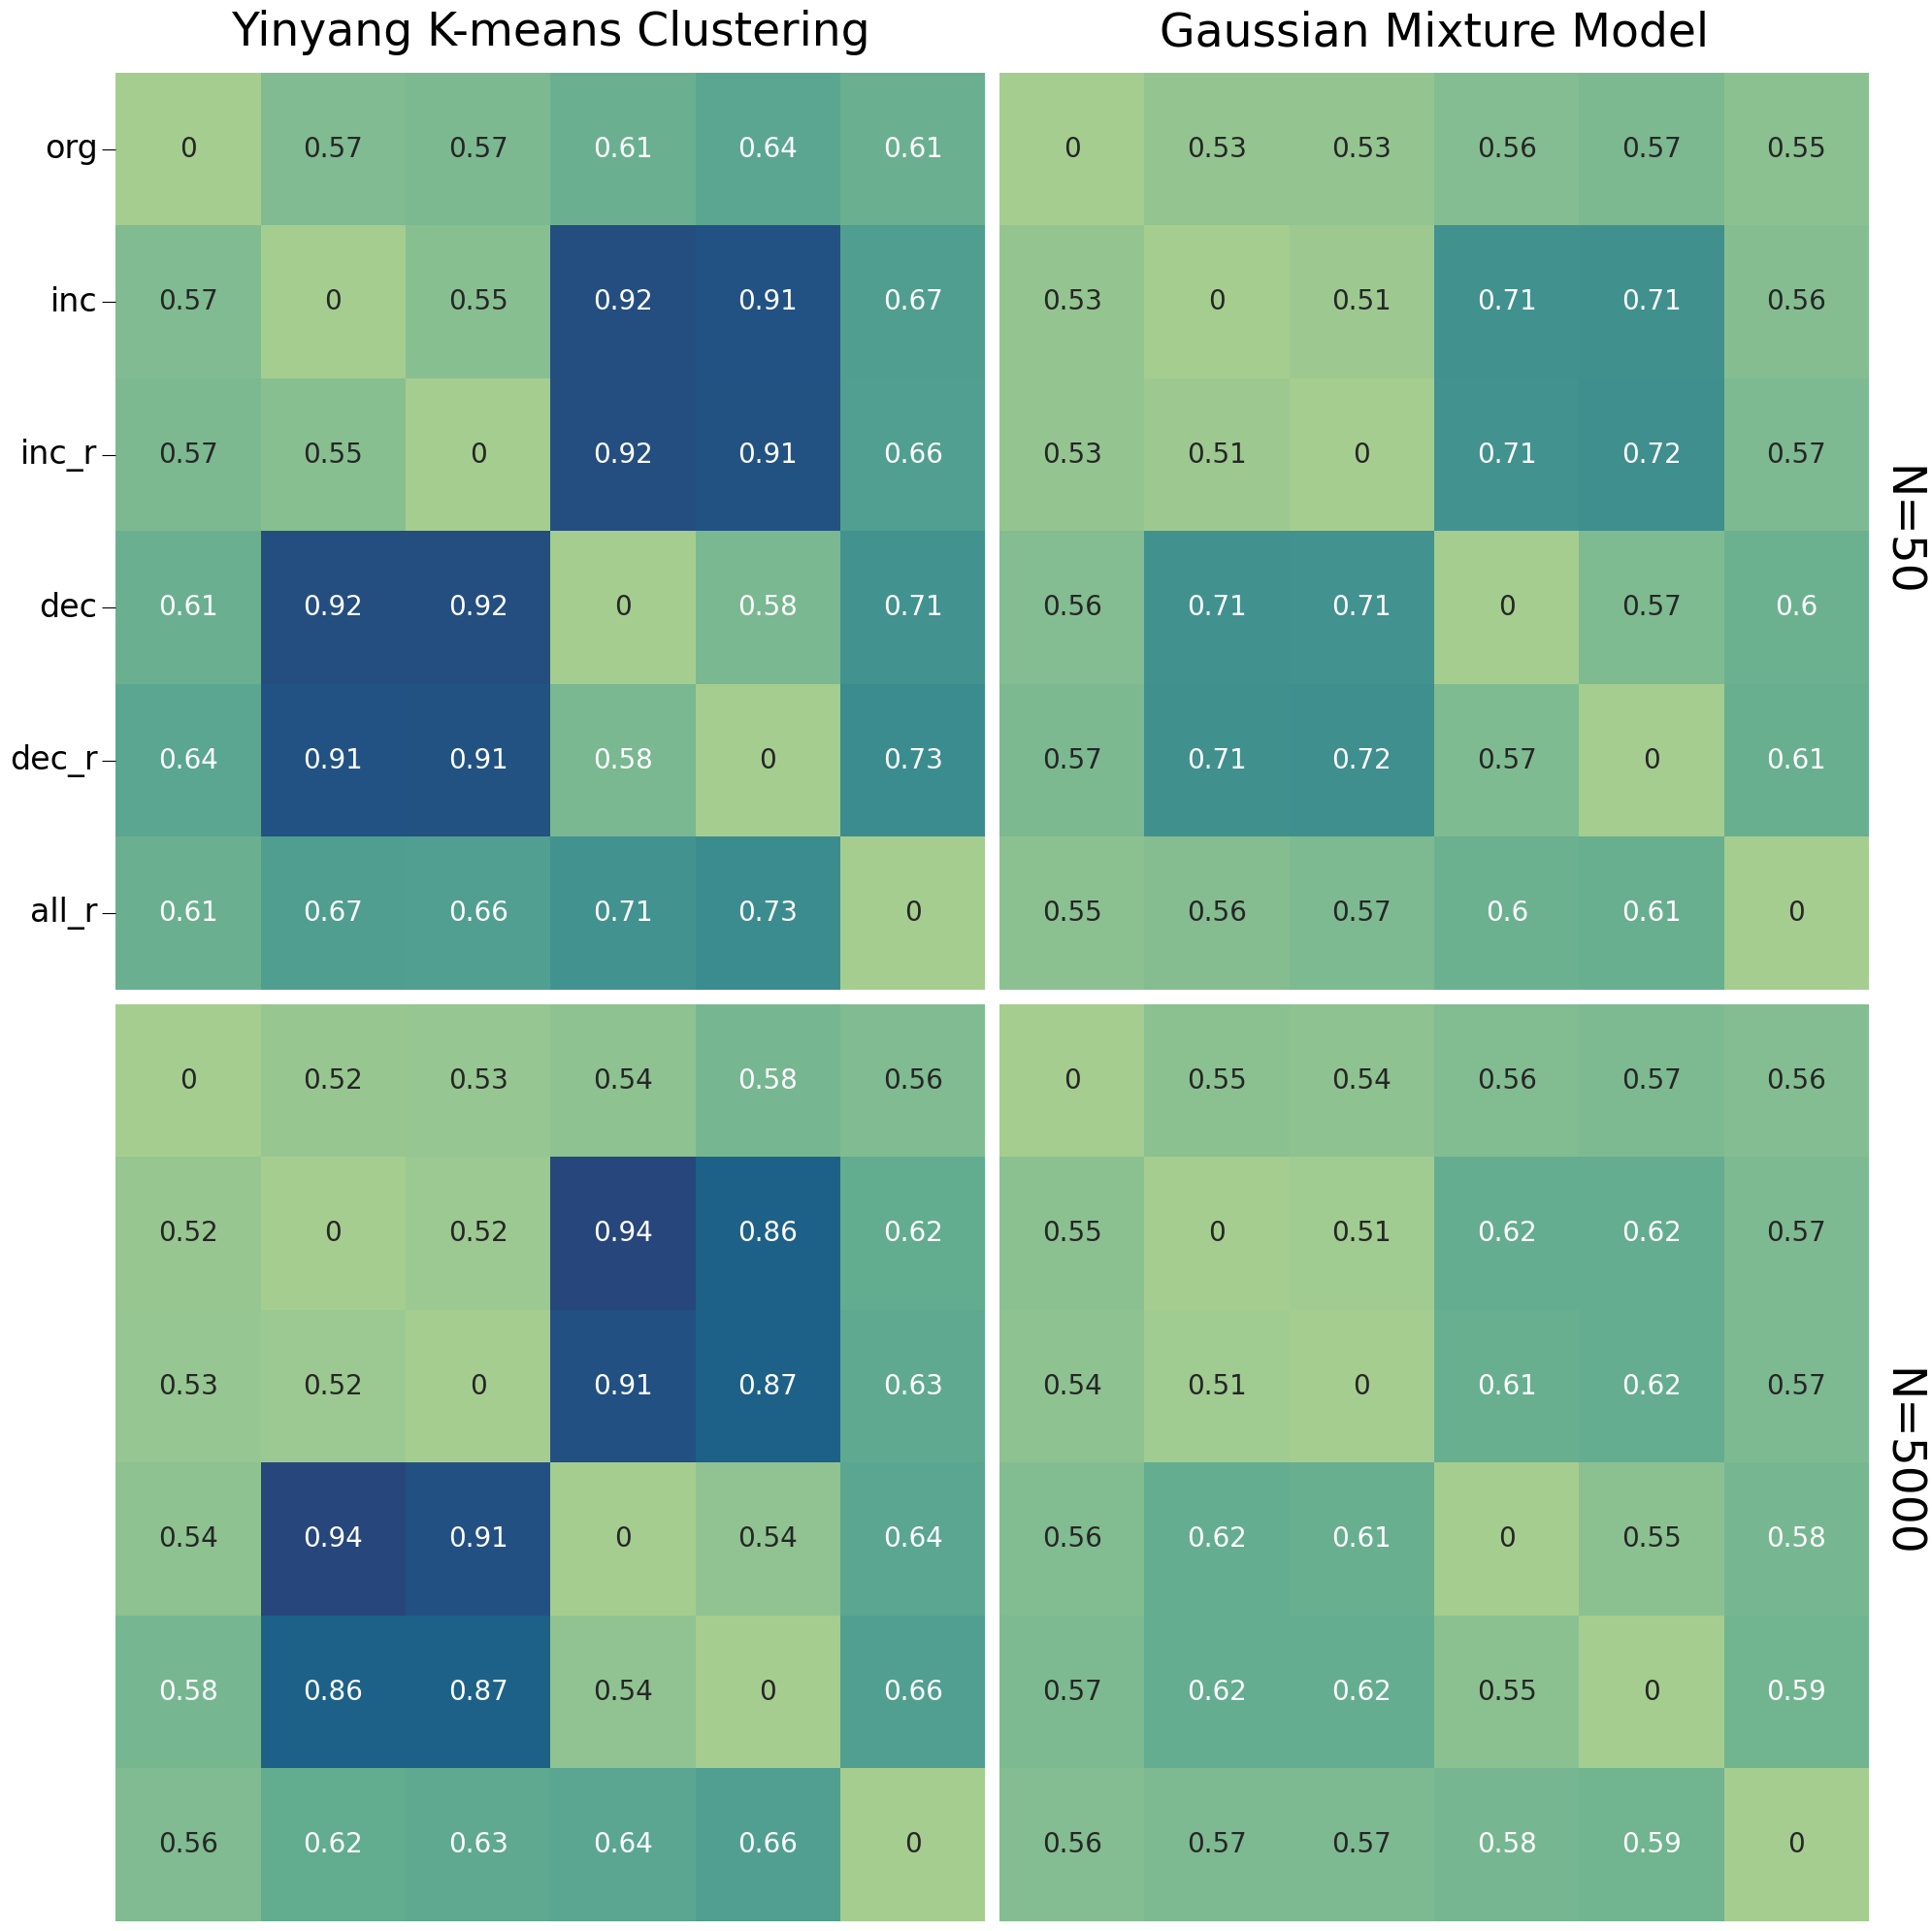

In [8]:
# Figure 3

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":20});
plot.tick_params(axis='y', rotation=0, labelsize=24, size =10)
plot.set_title('Yinyang K-means Clustering', fontsize=34, pad=20)


df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":20});
plot.tick_params(axis='y', rotation=0, labelsize=18, size =10)
plot.set_title('Gaussian Mixture Model', fontsize=34, pad=20)


df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":20});
plot.tick_params(axis='y', rotation=0, labelsize=18, size =10)


df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":20});
plot.tick_params(axis='y', rotation=0, labelsize=18, size =10)
   

ax[0, 1].text(1.01, 0.5, 'N=50', transform=ax[0, 1].transAxes, ha='left', va='center', fontsize=34, rotation = 270)
ax[1, 1].text(1.01, 0.5, 'N=5000', transform=ax[1, 1].transAxes, ha='left', va='center', fontsize=34, rotation = 270)
plt.tight_layout()


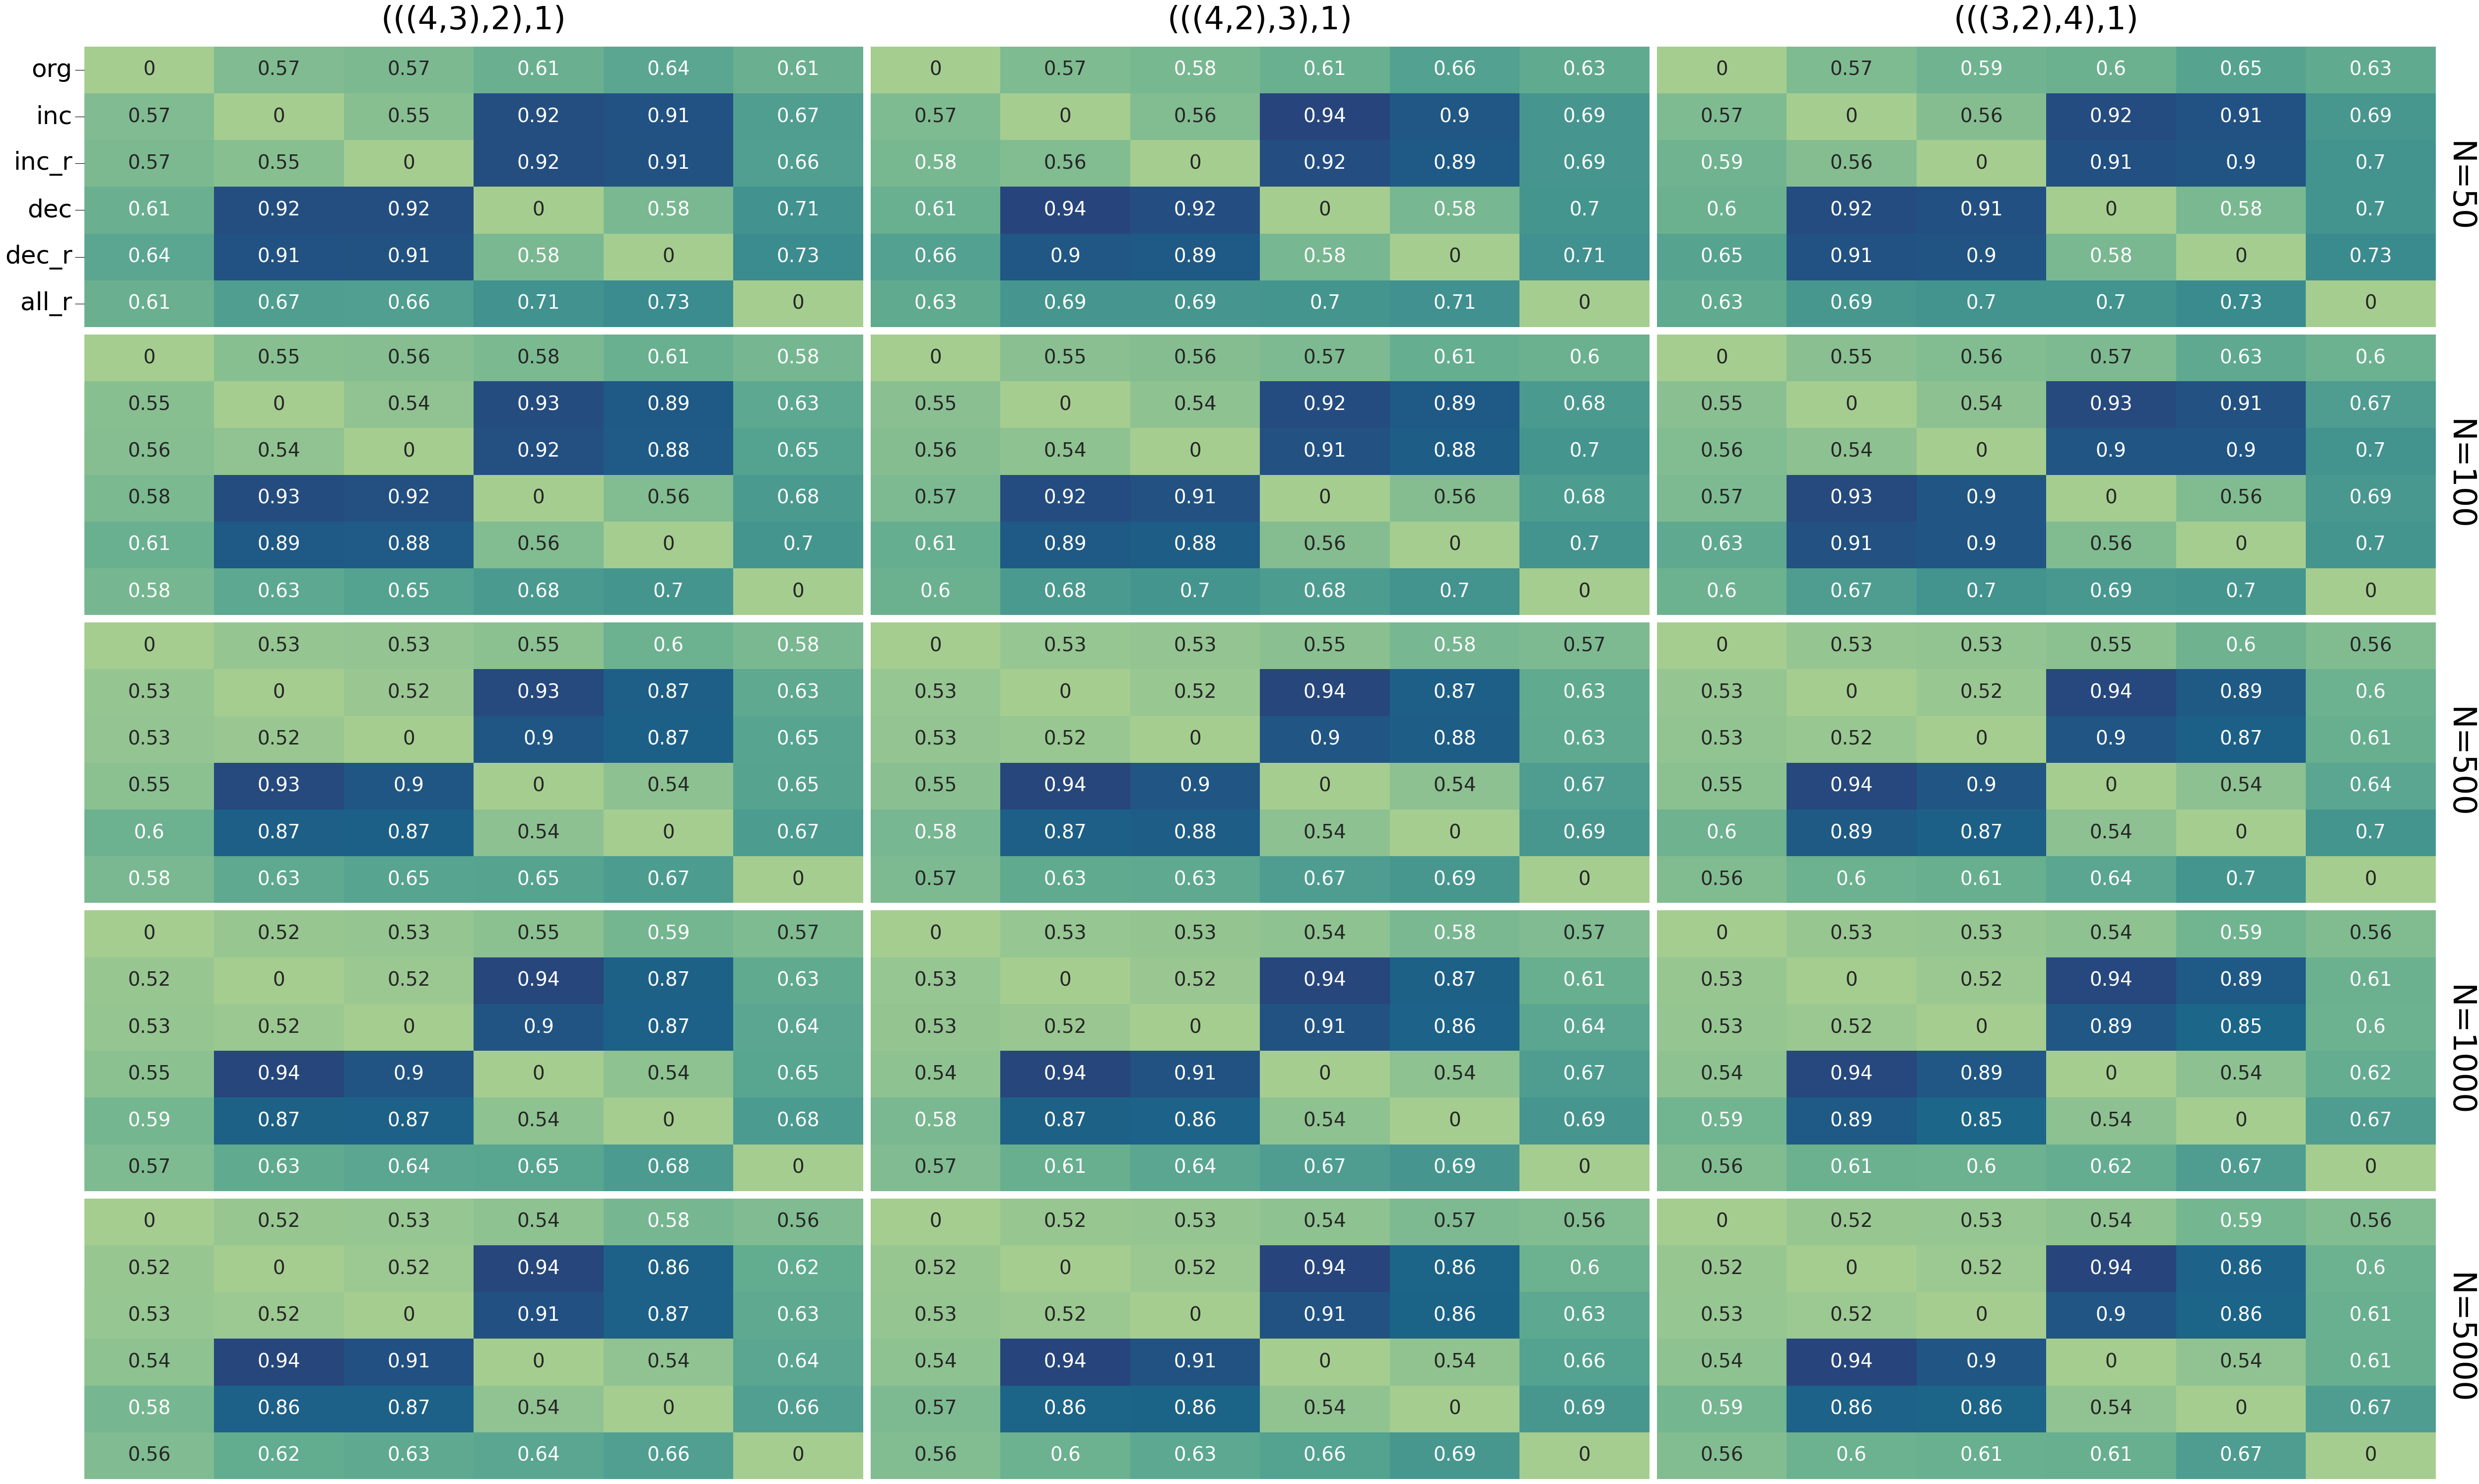

In [9]:
# Figure 4
fig, ax = plt.subplots(5, 3, figsize=(50, 30))

df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":28});
plot.tick_params(axis='y', rotation=0, labelsize=36, size =14)
plot.set_title('(((4,3),2),1)', fontsize=46, pad=25)

df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_2_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_2_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});
plot.set_title('(((4,2),3),1)', fontsize=46, pad=25)

df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_3_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_3_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change


plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});
plot.set_title('(((3,2),4),1)', fontsize=46, pad=25)


df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False,annot_kws={"fontsize":28});

df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_2_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_2_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});

df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_3_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_3_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});



df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[2, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False,annot_kws={"fontsize":28});

df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_2_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_2_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[2, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});

df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_3_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_3_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[2, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});


df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[3, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False,annot_kws={"fontsize":28});

df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_2_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_2_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[3, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});

df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_3_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_3_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[3, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});


df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_1_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[4, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False,annot_kws={"fontsize":28});
plot.tick_params(axis='y', rotation=0, labelsize=28, size =14)

df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_2_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_2_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[4, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});

df = pd.read_csv("../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_3_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_3_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[4, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});


ax[0, 2].text(1.01, 0.5, 'N=50', transform=ax[0, 2].transAxes, ha='left', va='center', fontsize=46, rotation = 270)
ax[1, 2].text(1.01, 0.5, 'N=100', transform=ax[1, 2].transAxes, ha='left', va='center', fontsize=46, rotation = 270)
ax[2, 2].text(1.01, 0.5, 'N=500', transform=ax[2, 2].transAxes, ha='left', va='center', fontsize=46, rotation = 270)
ax[3, 2].text(1.01, 0.5, 'N=1000', transform=ax[3, 2].transAxes, ha='left', va='center', fontsize=46, rotation = 270)
ax[4, 2].text(1.01, 0.5, 'N=5000', transform=ax[4, 2].transAxes, ha='left', va='center', fontsize=46, rotation = 270)  
plt.tight_layout()


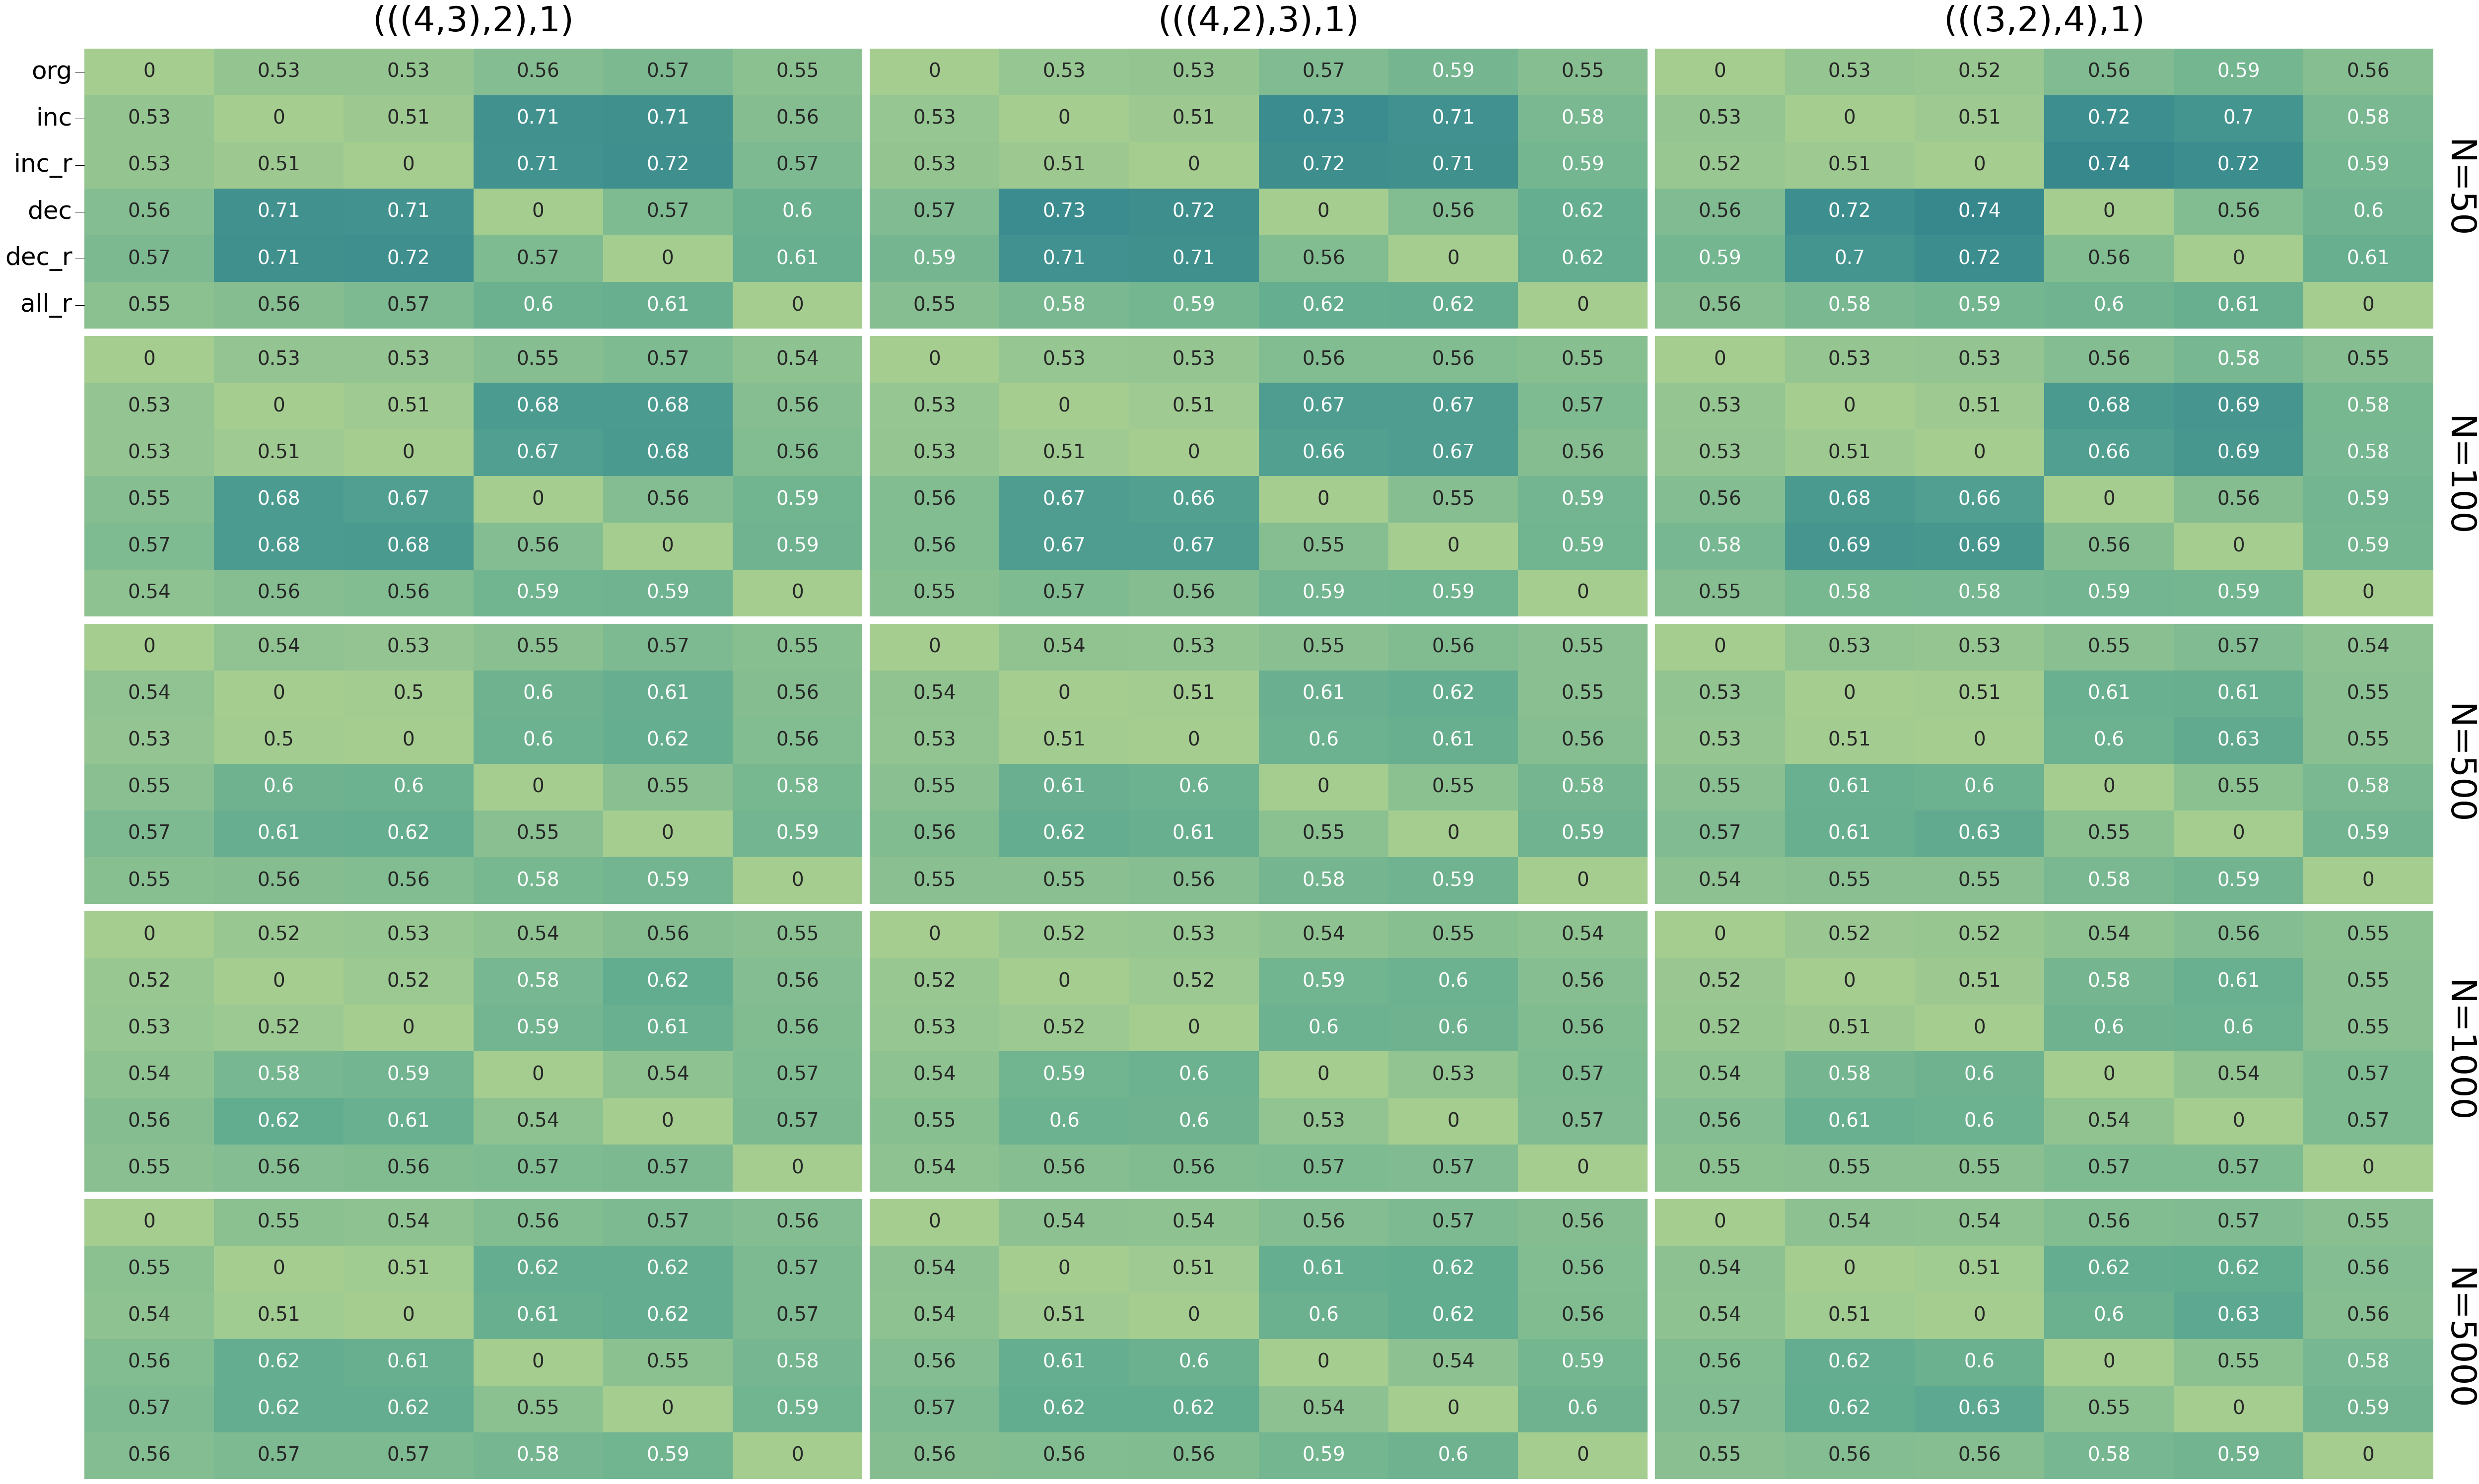

In [10]:
# Figure 5
fig, ax = plt.subplots(5, 3, figsize=(50, 30))

df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":28});
plot.tick_params(axis='y', rotation=0, labelsize=36, size =14)
plot.set_title('(((4,3),2),1)', fontsize=50, pad=25)

df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_2_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_2_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});
plot.set_title('(((4,2),3),1)', fontsize=50, pad=25)

df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_3_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_3_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change


plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});
plot.set_title('(((3,2),4),1)', fontsize=50, pad=25)


df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False,annot_kws={"fontsize":28});
plot.tick_params(axis='y', rotation=0, labelsize=32, size =14)

df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_2_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_2_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});

df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_3_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_3_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});



df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[2, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False,annot_kws={"fontsize":28});

df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_2_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_2_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[2, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});

df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_3_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_3_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[2, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});


df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[3, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False,annot_kws={"fontsize":28});
plot.tick_params(axis='y', rotation=0, labelsize=28, size =14)

df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_2_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_2_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[3, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});

df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_3_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_3_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[3, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});


df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_1_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[4, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False,annot_kws={"fontsize":28});
plot.tick_params(axis='y', rotation=0, labelsize=28, size =14)

df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_2_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_2_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[4, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});

df = pd.read_csv("../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_3_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_3_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
df.columns = change
df.index = change

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[4, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False,yticklabels=False, annot_kws={"fontsize":28});


ax[0, 2].text(1.01, 0.5, 'N=50', transform=ax[0, 2].transAxes, ha='left', va='center', fontsize=50, rotation = 270)
ax[1, 2].text(1.01, 0.5, 'N=100', transform=ax[1, 2].transAxes, ha='left', va='center', fontsize=50, rotation = 270)
ax[2, 2].text(1.01, 0.5, 'N=500', transform=ax[2, 2].transAxes, ha='left', va='center', fontsize=50, rotation = 270)
ax[3, 2].text(1.01, 0.5, 'N=1000', transform=ax[3, 2].transAxes, ha='left', va='center', fontsize=50, rotation = 270)
ax[4, 2].text(1.01, 0.5, 'N=5000', transform=ax[4, 2].transAxes, ha='left', va='center', fontsize=50, rotation = 270)
plt.tight_layout()


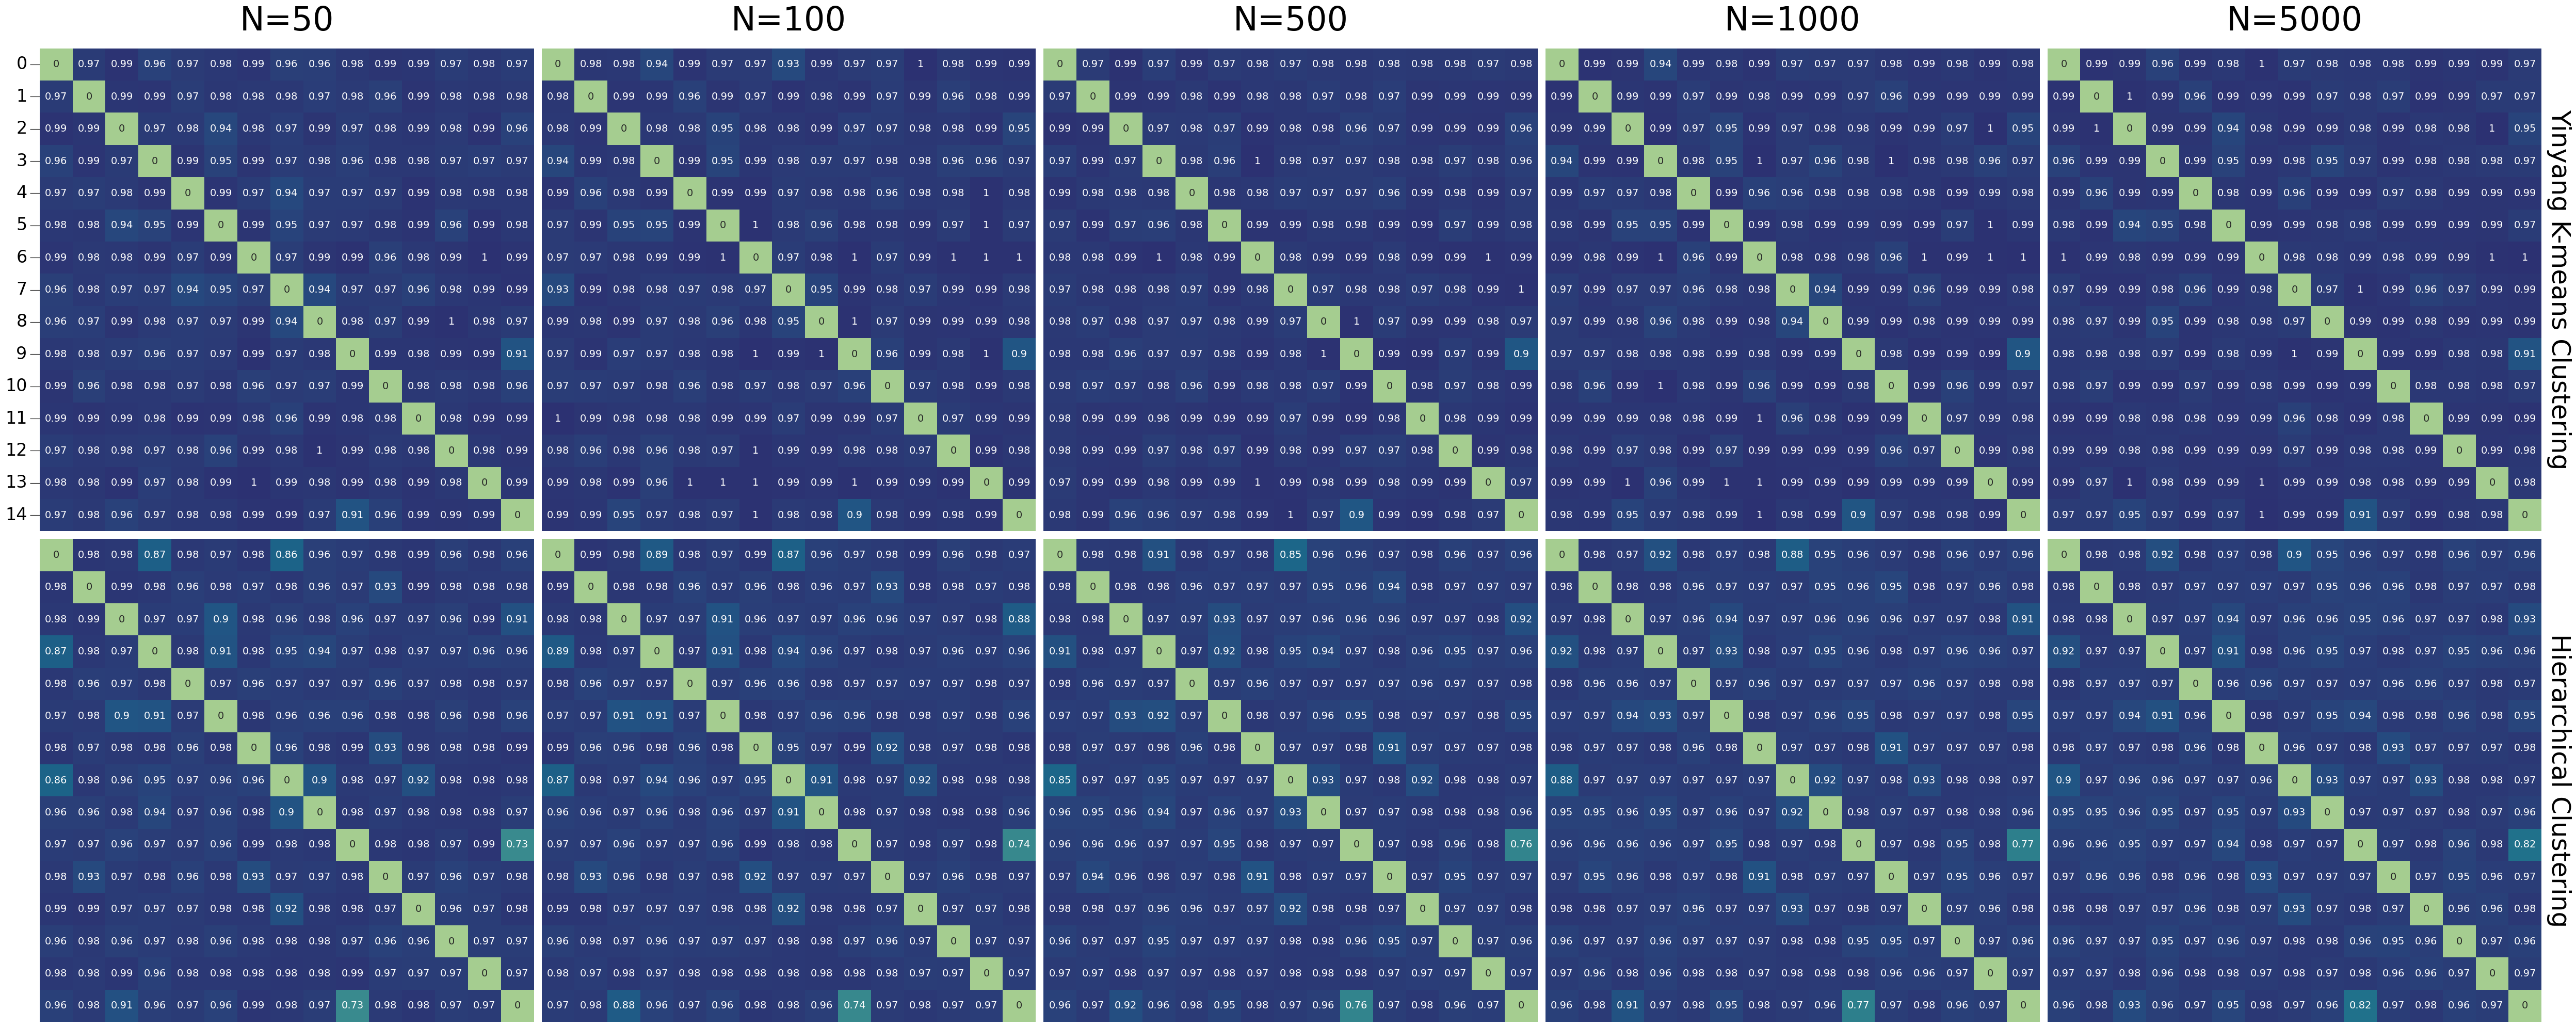

In [15]:
# Figure 6
fig, ax = plt.subplots(2, 5, figsize=(50, 20))

df = pd.read_csv("../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":14});
plot.tick_params(axis='y', rotation=0, labelsize=24, size =14)
plot.set_title('N=50', fontsize=46, pad=25)

df = pd.read_csv("../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False,annot_kws={"fontsize":14});
plot.set_title('N=100', fontsize=46, pad=25)

df = pd.read_csv("../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)


plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});
plot.set_title('N=500', fontsize=46, pad=25)

df = pd.read_csv("../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 3], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});
plot.set_title('N=1000', fontsize=46, pad=25)

df = pd.read_csv("../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 4], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});
plot.set_title('N=5000', fontsize=46, pad=25)


df = pd.read_csv("../../data/result/8-taxon/hc/hc_8_diff_topo_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/8-taxon/hc/hc_8_diff_topo_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});

df = pd.read_csv("../../data/result/8-taxon/hc/hc_8_diff_topo_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/8-taxon/hc/hc_8_diff_topo_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False,annot_kws={"fontsize":14});

df = pd.read_csv("../../data/result/8-taxon/hc/hc_8_diff_topo_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/8-taxon/hc/hc_8_diff_topo_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)
plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});


df = pd.read_csv("../../data/result/8-taxon/hc/hc_8_diff_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/8-taxon/hc/hc_8_diff_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 3], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});


df = pd.read_csv("../../data/result/8-taxon/hc/hc_8_diff_topo_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/8-taxon/hc/hc_8_diff_topo_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 4], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});

ax[0, 4].text(1.01, 0.5, 'Yinyang K-means Clustering', transform=ax[0, 4].transAxes, ha='left', va='center', fontsize=36, rotation = 270)
ax[1, 4].text(1.01, 0.5, 'Hierarchical Clustering', transform=ax[1, 4].transAxes, ha='left', va='center', fontsize=36, rotation = 270)
plt.tight_layout()


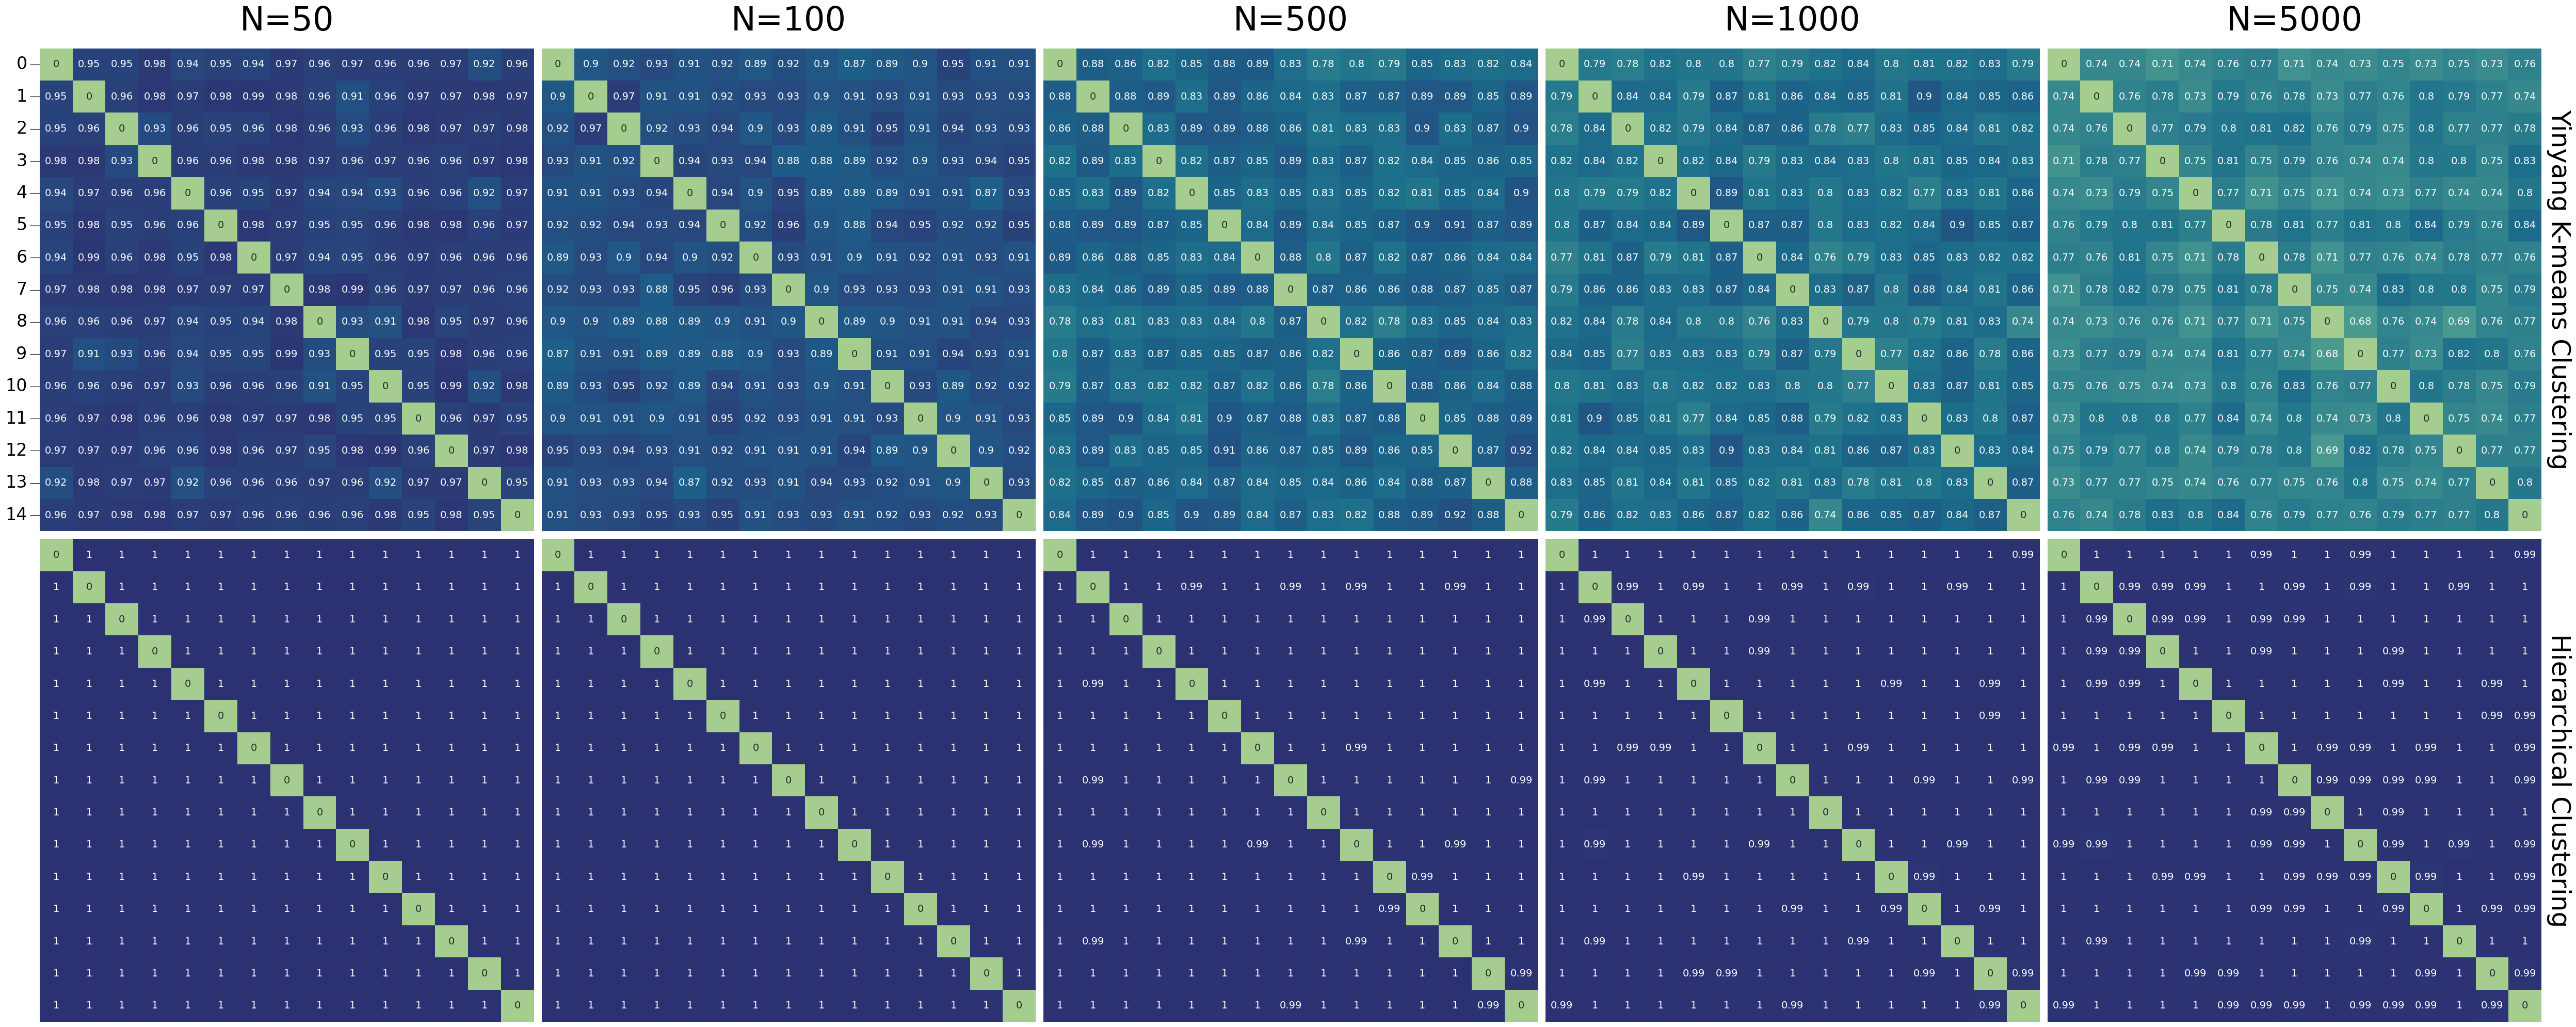

In [16]:
# Figure 7
fig, ax = plt.subplots(2, 5, figsize=(50, 20))

df = pd.read_csv("../../data/result/16-taxon/repKmeans/kmeans_16_diff_topo_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/16-taxon/repKmeans/kmeans_16_diff_topo_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":14});
plot.tick_params(axis='y', rotation=0, labelsize=24, size =14)
plot.set_title('N=50', fontsize=46, pad=25)

df = pd.read_csv("../../data/result/16-taxon/repKmeans/kmeans_16_diff_topo_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/16-taxon/repKmeans/kmeans_16_diff_topo_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)


plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False,annot_kws={"fontsize":14});
plot.set_title('N=100', fontsize=46, pad=25)

df = pd.read_csv("../../data/result/16-taxon/repKmeans/kmeans_16_diff_topo_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/16-taxon/repKmeans/kmeans_16_diff_topo_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});
plot.set_title('N=500', fontsize=46, pad=25)

df = pd.read_csv("../../data/result/16-taxon/repKmeans/kmeans_16_diff_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/16-taxon/repKmeans/kmeans_16_diff_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 3], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});
plot.set_title('N=1000', fontsize=46, pad=25)

df = pd.read_csv("../../data/result/16-taxon/repKmeans/kmeans_16_diff_topo_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/16-taxon/repKmeans/kmeans_16_diff_topo_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 4], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});
plot.set_title('N=5000', fontsize=46, pad=25)


df = pd.read_csv("../../data/result/16-taxon/hc/hc_16_diff_topo_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/16-taxon/hc/hc_16_diff_topo_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});

df = pd.read_csv("../../data/result/16-taxon/hc/hc_16_diff_topo_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/16-taxon/hc/hc_16_diff_topo_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False,annot_kws={"fontsize":14});

df = pd.read_csv("../../data/result/16-taxon/hc/hc_16_diff_topo_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/16-taxon/hc/hc_16_diff_topo_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});

df = pd.read_csv("../../data/result/16-taxon/hc/hc_16_diff_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/16-taxon/hc/hc_16_diff_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 3], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});


df = pd.read_csv("../../data/result/16-taxon/hc/hc_16_diff_topo_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/result/16-taxon/hc/hc_16_diff_topo_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 4], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":14});

ax[0, 4].text(1.01, 0.5, 'Yinyang K-means Clustering', transform=ax[0, 4].transAxes, ha='left', va='center', fontsize=36, rotation = 270)
ax[1, 4].text(1.01, 0.5, 'Hierarchical Clustering', transform=ax[1, 4].transAxes, ha='left', va='center', fontsize=36, rotation = 270)
plt.tight_layout()


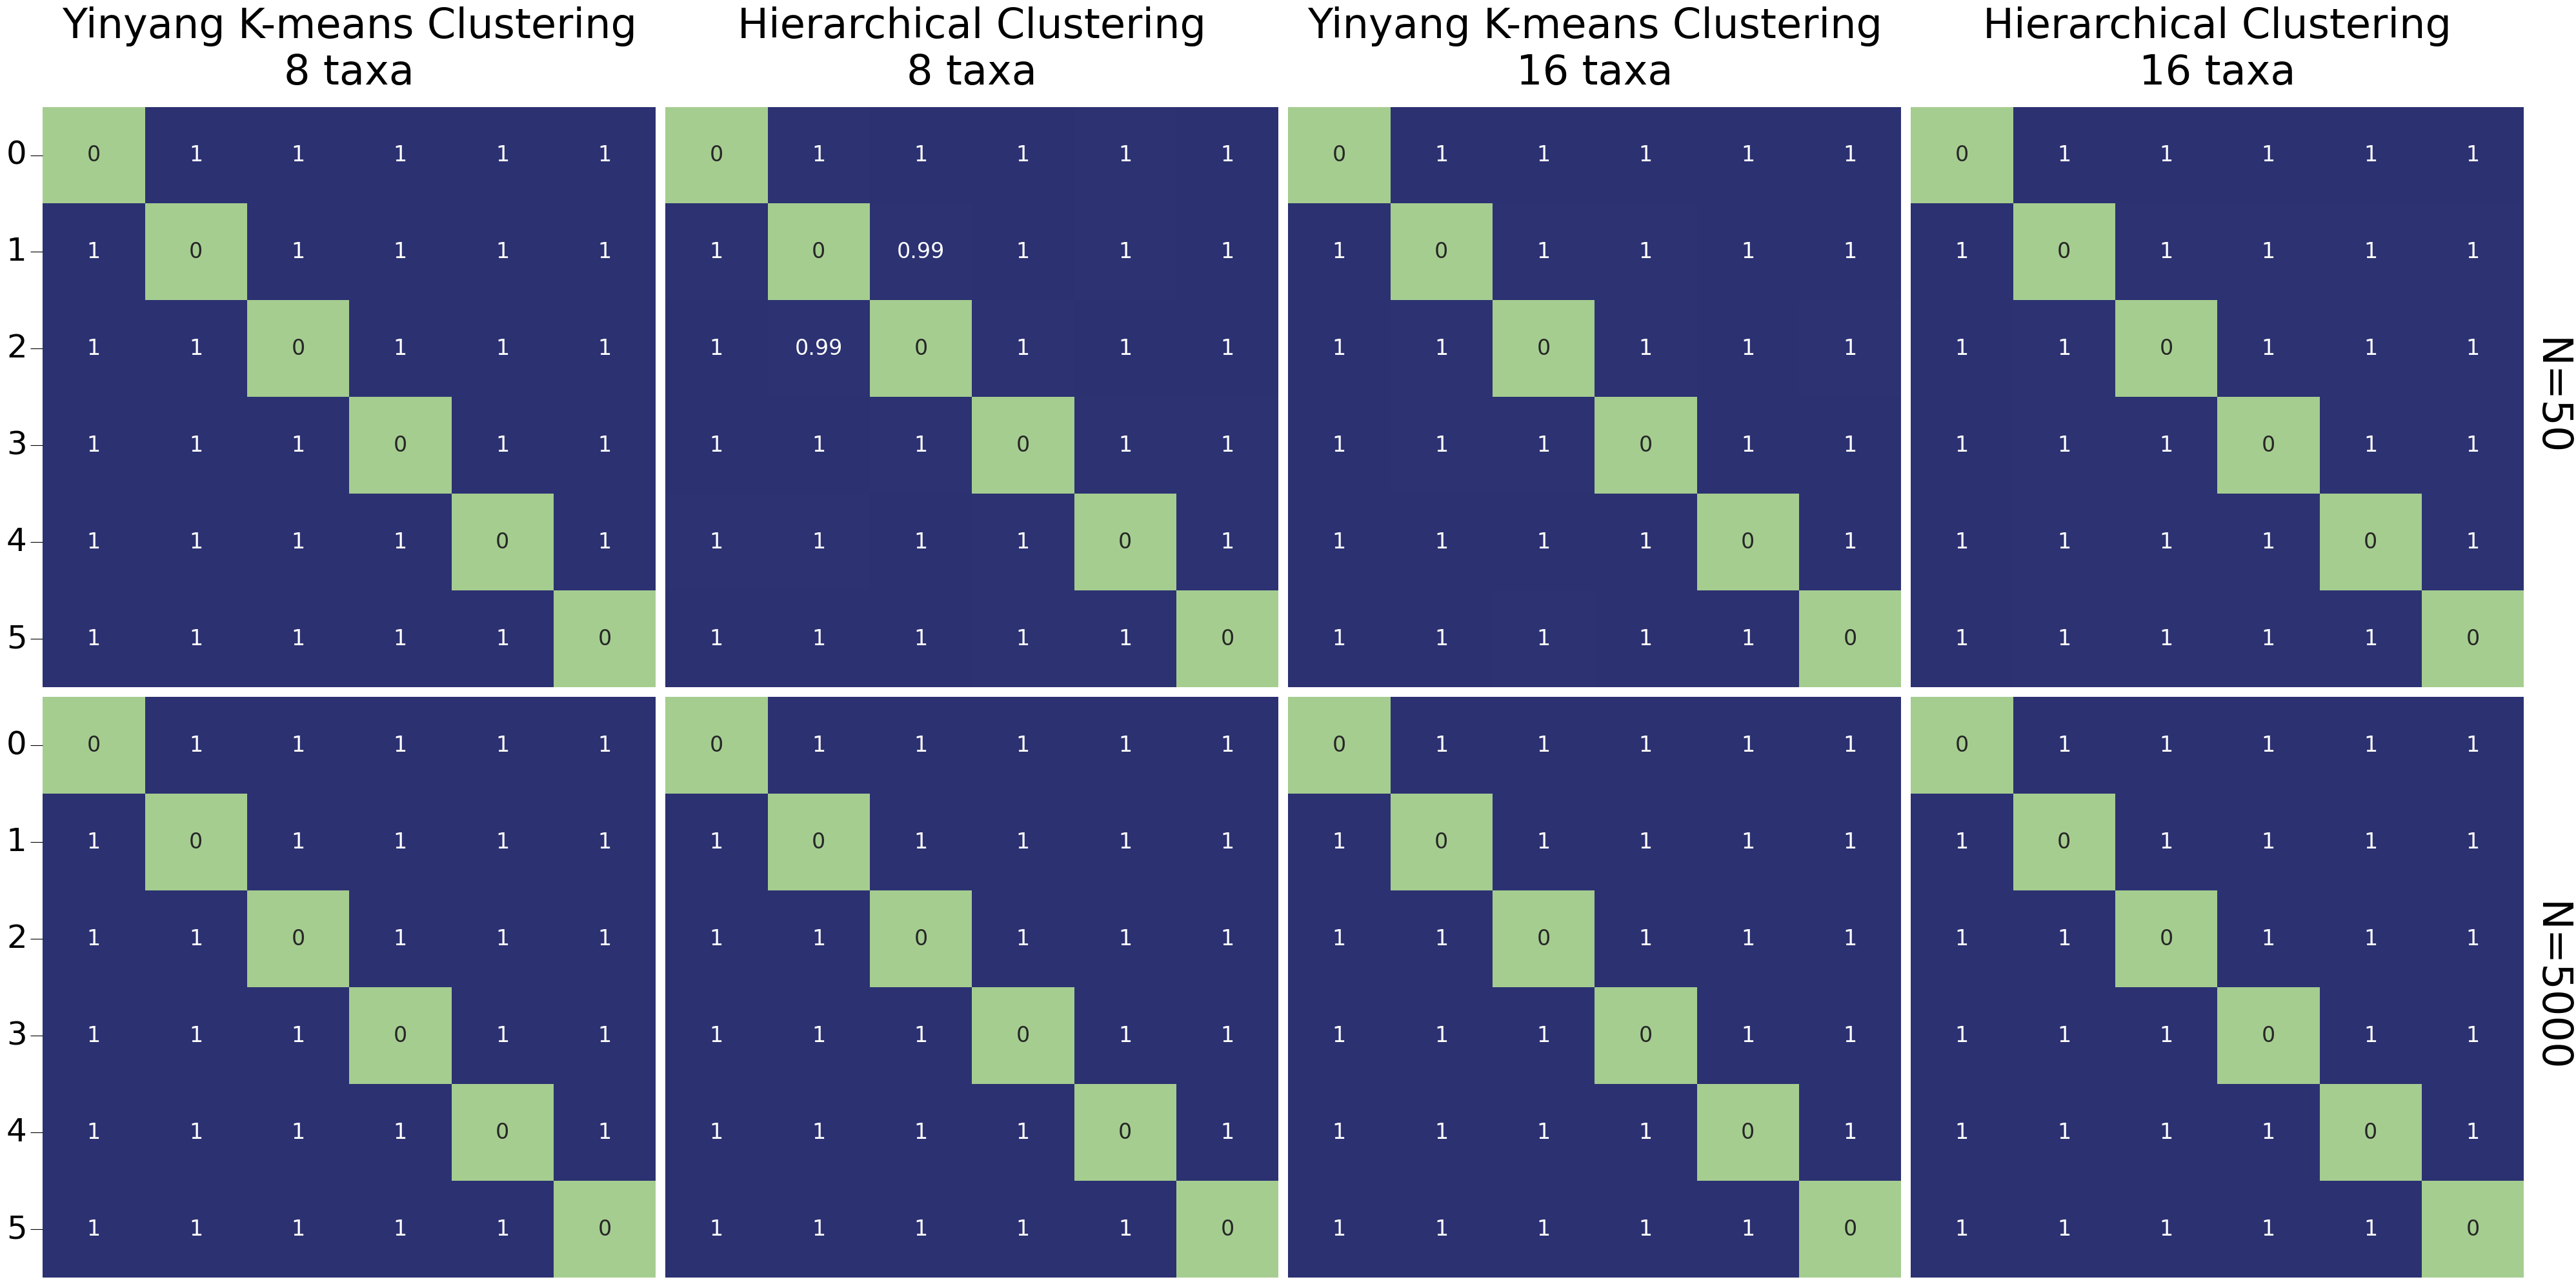

In [17]:
# Figure 8a
fig, ax = plt.subplots(2, 4, figsize=(40, 20))

df = pd.read_csv("../../data/NNI/result/8/kmeans/kmeans_nni_8_reuslt_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/8/kmeans/kmeans_nni_8_reuslt_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":24});
plot.tick_params(axis='y', rotation=0, labelsize=36, size =14)
plot.set_title('Yinyang K-means Clustering\n8 taxa', fontsize=46, pad=25)

df = pd.read_csv("../../data/NNI/result/8/hc/hc_nni_8_reuslt_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/8/hc/hc_nni_8_reuslt_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});
plot.set_title('Hierarchical Clustering\n8 taxa', fontsize=46, pad=25)



df = pd.read_csv("../../data/NNI/result/16/kmeans/kmeans_nni_16_reuslt_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/16/kmeans/kmeans_nni_16_reuslt_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});
plot.set_title('Yinyang K-means Clustering\n16 taxa', fontsize=46, pad=25)

df = pd.read_csv("../../data/NNI/result/16/hc/hc_nni_16_reuslt_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/16/hc/hc_nni_16_reuslt_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 3], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});
plot.set_title('Hierarchical Clustering\n16 taxa', fontsize=46, pad=25)

df = pd.read_csv("../../data/NNI/result/8/kmeans/kmeans_nni_8_reuslt_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/8/kmeans/kmeans_nni_8_reuslt_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":24});
plot.tick_params(axis='y', rotation=0, labelsize=36, size =14)

df = pd.read_csv("../../data/NNI/result/8/hc/hc_nni_8_reuslt_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/8/hc/hc_nni_8_reuslt_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});



df = pd.read_csv("../../data/NNI/result/16/kmeans/kmeans_nni_16_reuslt_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/16/kmeans/kmeans_nni_16_reuslt_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});

df = pd.read_csv("../../data/NNI/result/16/hc/hc_nni_16_reuslt_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/16/hc/hc_nni_16_reuslt_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 3], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});

ax[0, 3].text(1.01, 0.5, 'N=50', transform=ax[0, 3].transAxes, ha='left', va='center', fontsize=46, rotation = 270)
ax[1, 3].text(1.01, 0.5, 'N=5000', transform=ax[1, 3].transAxes, ha='left', va='center', fontsize=46, rotation = 270)
plt.tight_layout()

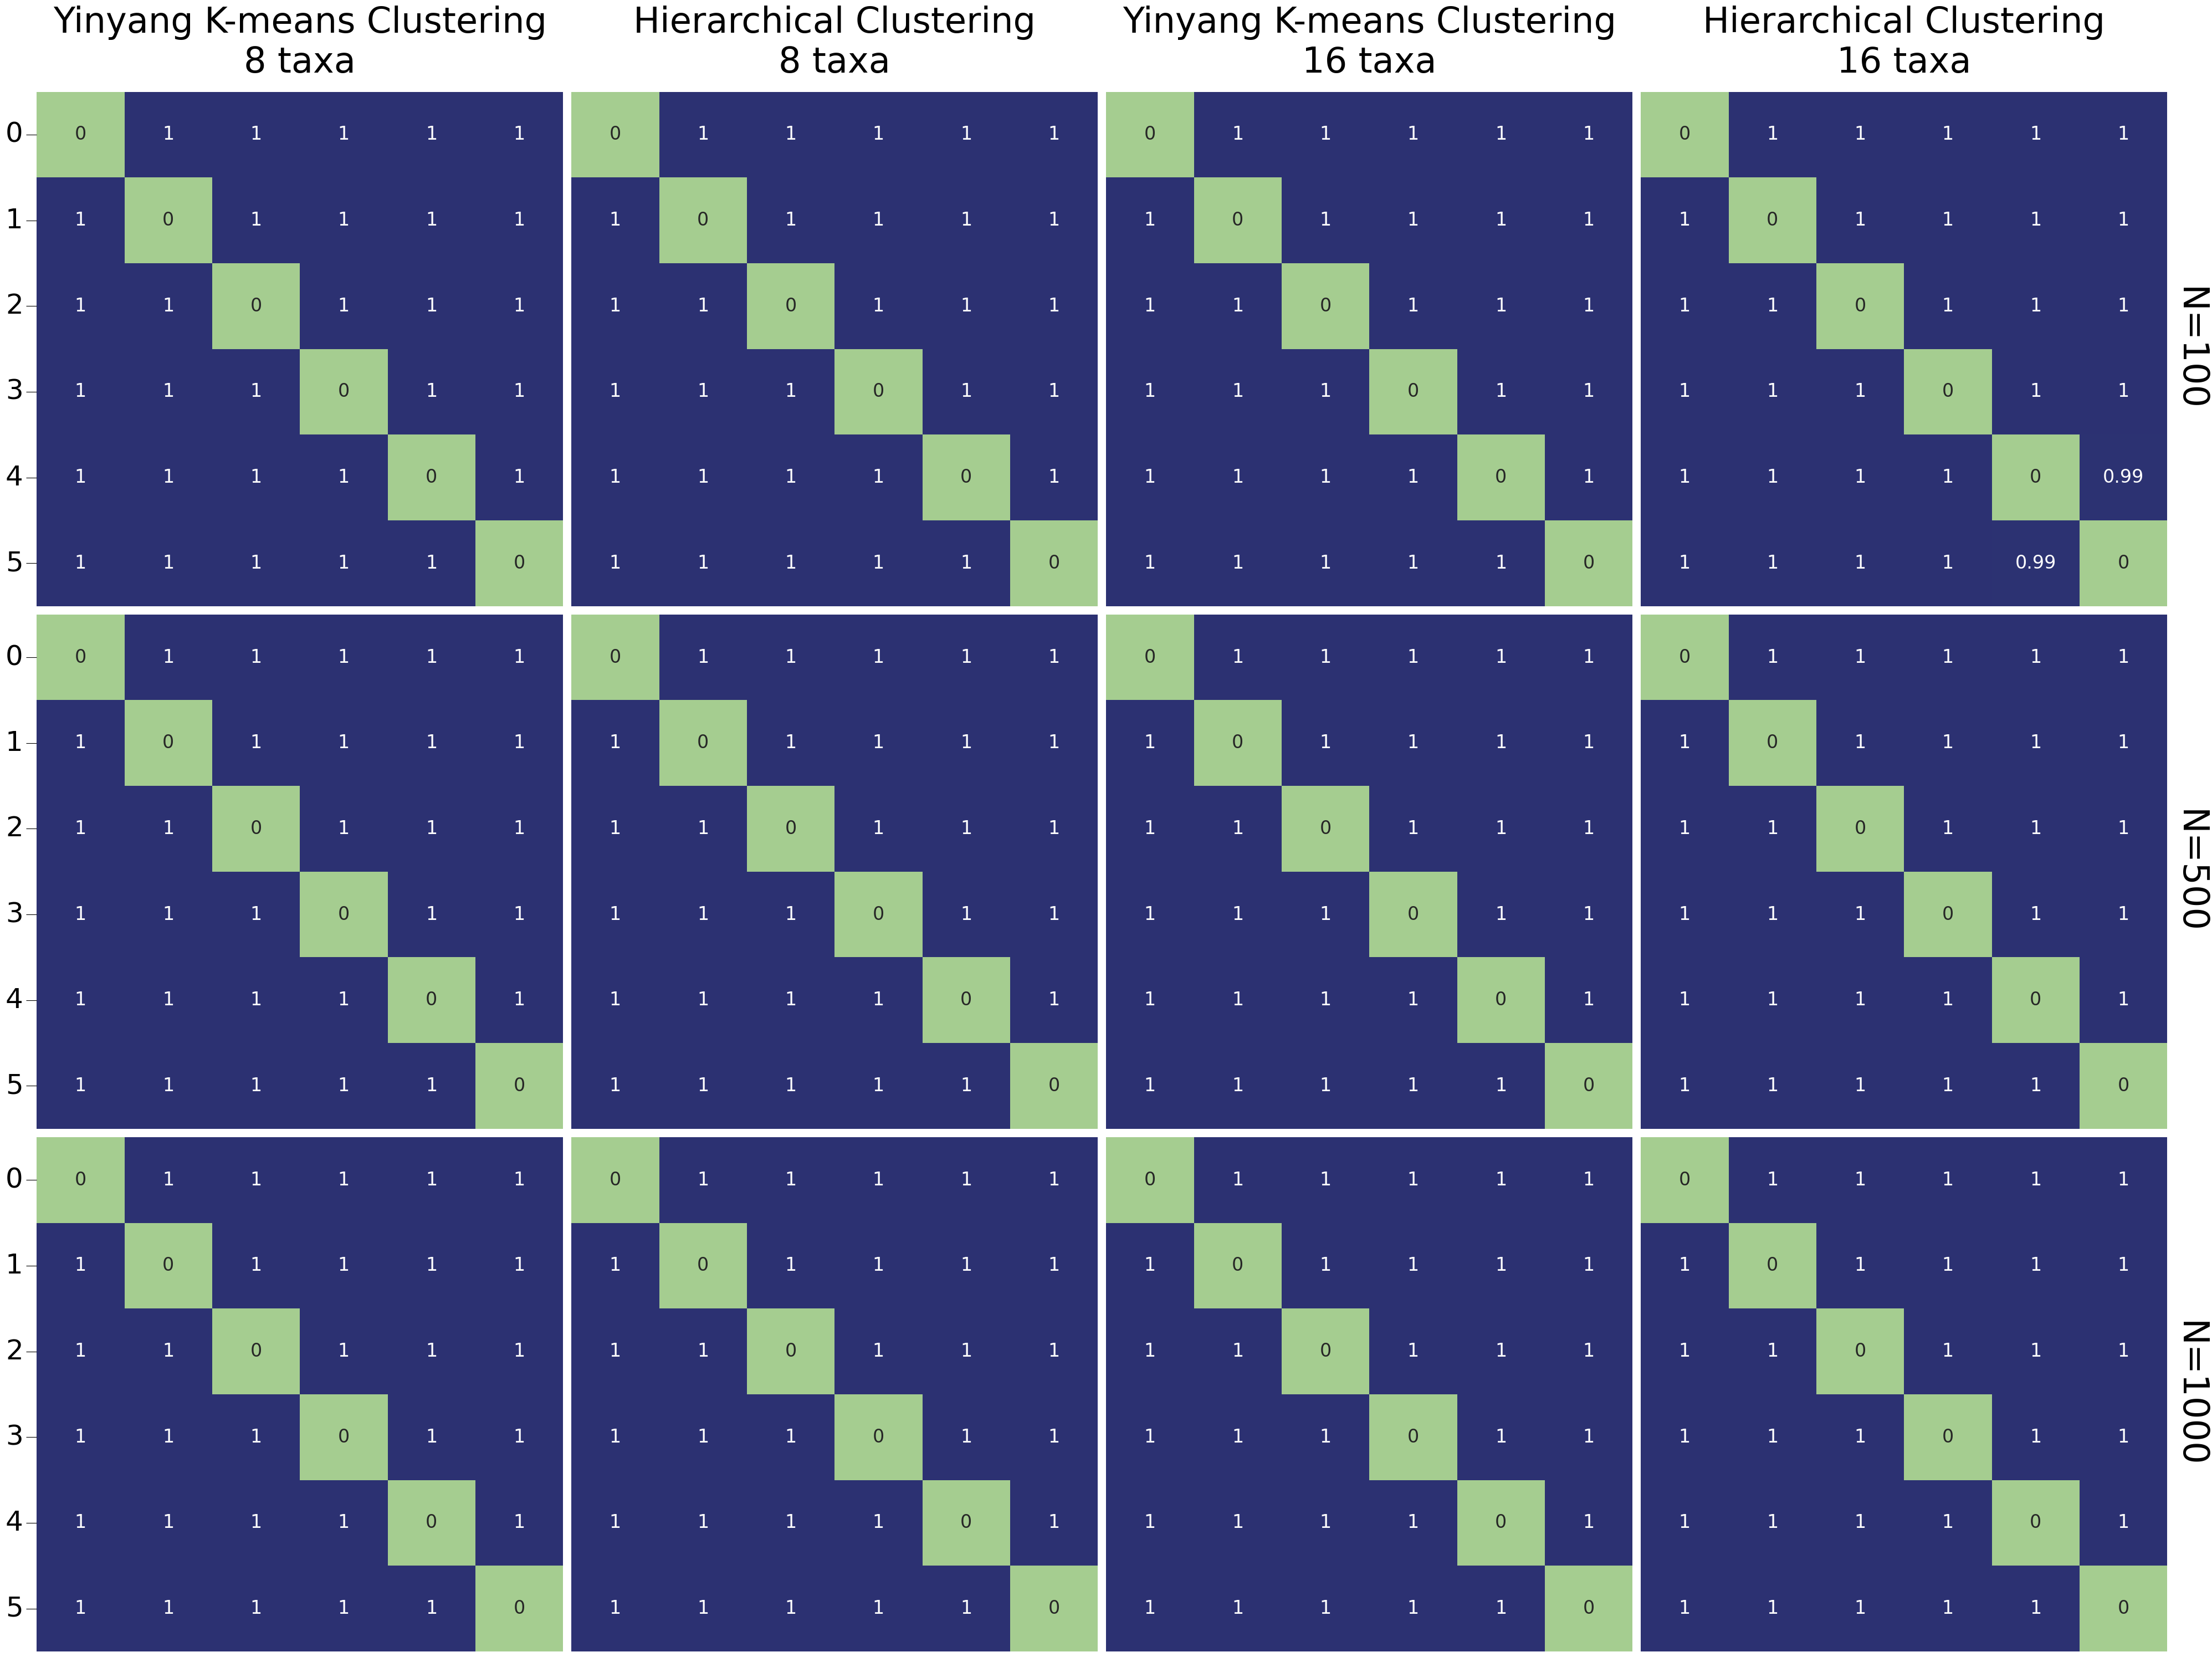

In [18]:
# Figure 8b
fig, ax = plt.subplots(3, 4, figsize=(40, 30))

df = pd.read_csv("../../data/NNI/result/8/kmeans/kmeans_nni_8_reuslt_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/8/kmeans/kmeans_nni_8_reuslt_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":24});
plot.tick_params(axis='y', rotation=0, labelsize=36, size =14)
plot.set_title('Yinyang K-means Clustering\n8 taxa', fontsize=46, pad=25)

df = pd.read_csv("../../data/NNI/result/8/hc/hc_nni_8_reuslt_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/8/hc/hc_nni_8_reuslt_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});
plot.set_title('Hierarchical Clustering\n8 taxa', fontsize=46, pad=25)



df = pd.read_csv("../../data/NNI/result/16/kmeans/kmeans_nni_16_reuslt_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/16/kmeans/kmeans_nni_16_reuslt_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});
plot.set_title('Yinyang K-means Clustering\n16 taxa', fontsize=46, pad=25)

df = pd.read_csv("../../data/NNI/result/16/hc/hc_nni_16_reuslt_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/16/hc/hc_nni_16_reuslt_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[0, 3], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});
plot.set_title('Hierarchical Clustering\n16 taxa', fontsize=46, pad=25)


df = pd.read_csv("../../data/NNI/result/8/kmeans/kmeans_nni_8_reuslt_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/8/kmeans/kmeans_nni_8_reuslt_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":24});
plot.tick_params(axis='y', rotation=0, labelsize=36, size =14)

df = pd.read_csv("../../data/NNI/result/8/hc/hc_nni_8_reuslt_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/8/hc/hc_nni_8_reuslt_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});



df = pd.read_csv("../../data/NNI/result/16/kmeans/kmeans_nni_16_reuslt_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/16/kmeans/kmeans_nni_16_reuslt_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});

df = pd.read_csv("../../data/NNI/result/16/hc/hc_nni_16_reuslt_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/16/hc/hc_nni_16_reuslt_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[1, 3], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});


df = pd.read_csv("../../data/NNI/result/8/kmeans/kmeans_nni_8_reuslt_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/8/kmeans/kmeans_nni_8_reuslt_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[2, 0], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, annot_kws={"fontsize":24});
plot.tick_params(axis='y', rotation=0, labelsize=36, size =14)

df = pd.read_csv("../../data/NNI/result/8/hc/hc_nni_8_reuslt_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/8/hc/hc_nni_8_reuslt_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[2, 1], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});



df = pd.read_csv("../../data/NNI/result/16/kmeans/kmeans_nni_16_reuslt_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/16/kmeans/kmeans_nni_16_reuslt_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[2, 2], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});

df = pd.read_csv("../../data/NNI/result/16/hc/hc_nni_16_reuslt_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../data/NNI/result/16/hc/hc_nni_16_reuslt_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
df = pd.DataFrame(accuracy)

plot = sns.heatmap(df, annot=True, cmap="crest",ax=ax[2, 3], vmin = 0.5, vmax = 1, cbar=False, xticklabels=False, yticklabels=False, annot_kws={"fontsize":24});


ax[0, 3].text(1.01, 0.5, 'N=100', transform=ax[0, 3].transAxes, ha='left', va='center', fontsize=46, rotation = 270)
ax[1, 3].text(1.01, 0.5, 'N=500', transform=ax[1, 3].transAxes, ha='left', va='center', fontsize=46, rotation = 270)
ax[2, 3].text(1.01, 0.5, 'N=1000', transform=ax[2, 3].transAxes, ha='left', va='center', fontsize=46, rotation = 270)
plt.tight_layout()